In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dimensionality Reduction using PCA.
Creating linear regression models to predict the performance of an antenna.

## Data Analysis

### Data Analysis on The Input Data

In [164]:
#Data loading
data = pd.read_csv('hw1_input.csv')
data

length of patch  width of patch  height of patch  height of substrate  \
0           3.202024        2.288742         0.012514             0.139247   
1           2.107848        2.895504         0.037171             0.149492   
2           3.252113        4.818411         0.025432             0.578834   
3           4.161509        2.294309         0.011058             0.117266   
4           4.820912        2.948325         0.019658             0.163503   
..               ...             ...              ...                  ...   
380         3.950131        5.165856         0.034389             0.770787   
381         2.676373        2.826965         0.011377             0.106795   
382         4.406785        1.814310         0.011187             0.146086   
383         2.540721        3.310983         0.015000             0.135650   
384         2.425315        4.998480         0.029217             0.605634   

     height of solder resist layer  radius of the probe     c_pad  c_antipad  \
0                         0.041757             0.028566  0.000549   0.032403   
1                         0.056775             0.028930  0.005536   0.053647   
2                         0.029972             0.030922  0.020274   0.049845   
3                         0.093223             0.017604  0.001135   0.098610   
4                         0.094337             0.025757  0.021725   0.072813   
..                             ...                  ...       ...        ...   
380                       0.095579             0.025591  0.011430   0.048502   
381                       0.055925             0.042376  0.005102   0.060532   
382                       0.049041             0.040626  0.022849   0.033737   
383                       0.082388             0.043490  0.011130   0.033451   
384                       0.028654             0.037827  0.005896   0.033075   

      c_probe  dielectric constant of substrate  \
0    0.348140                          3.735926   
1    0.326369                          4.929862   
2    0.446639                          4.772670   
3    0.055665                          4.102438   
4    0.272282                          2.531031   
..        ...                               ...   
380  0.241219                          4.099788   
381  0.294000                          4.758303   
382  0.225794                          2.826602   
383  0.370502                          3.303852   
384  0.215161                          4.354493   

     dielectric constant of solder resist layer  
0                                      4.278575  
1                                      4.876068  
2                                      4.745106  
3                                      3.755671  
4                                      3.047553  
..                                          ...  
380                                    4.635040  
381                                    4.205687  
382                                    4.908306  
383                                    4.764701  
384                                    2.676568  

[385 rows x 11 columns]

We are dealing with a data with 384 instances, 11 numeric attributes whose ranges are given.

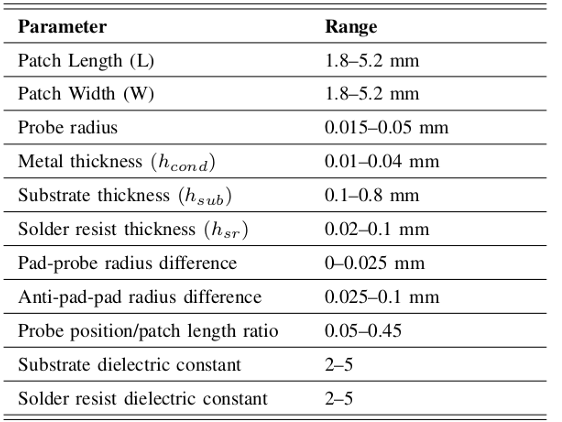

In [18]:
#Check summary statistics
data.describe()

length of patch  width of patch  height of patch  height of substrate  \
count       385.000000      385.000000       385.000000           385.000000   
mean          3.569210        3.536983         0.024273             0.347643   
std           0.966173        1.182100         0.008800             0.272738   
min           1.805658        1.801273         0.010008             0.100321   
25%           2.755534        2.501163         0.016194             0.126901   
50%           3.637716        3.215396         0.024198             0.155254   
75%           4.369311        4.829731         0.031688             0.649324   
max           5.199919        5.198689         0.039843             0.799082   

       height of solder resist layer  radius of the probe       c_pad  \
count                     385.000000           385.000000  385.000000   
mean                        0.060065             0.032198    0.012797   
std                         0.023670             0.010352    0.007111   
min                         0.020039             0.015012    0.000003   
25%                         0.038689             0.023389    0.006985   
50%                         0.060764             0.030979    0.012454   
75%                         0.080247             0.041819    0.019014   
max                         0.099728             0.049960    0.024996   

        c_antipad     c_probe  dielectric constant of substrate  \
count  385.000000  385.000000                        385.000000   
mean     0.060648    0.245586                          3.704384   
std      0.021503    0.111245                          0.853877   
min      0.025292    0.050810                          2.023380   
25%      0.042011    0.148565                          2.998152   
50%      0.060532    0.245049                          3.866295   
75%      0.078227    0.340203                          4.375551   
max      0.099945    0.449599                          4.999324   

       dielectric constant of solder resist layer  
count                                  385.000000  
mean                                     3.521911  
std                                      0.871233  
min                                      2.001679  
25%                                      2.783710  
50%                                      3.480916  
75%                                      4.278575  
max                                      4.999950

In [17]:
#Check correlation
data.corr()

length of patch  width of patch  \
length of patch                                    1.000000       -0.114174   
width of patch                                    -0.114174        1.000000   
height of patch                                   -0.026032        0.091726   
height of substrate                               -0.064344        0.923739   
height of solder resist layer                      0.044502       -0.021056   
radius of the probe                               -0.069905        0.035675   
c_pad                                             -0.005560       -0.044198   
c_antipad                                         -0.009627       -0.013358   
c_probe                                            0.081735        0.029999   
dielectric constant of substrate                  -0.037448        0.442193   
dielectric constant of solder resist layer        -0.014496        0.038746   

                                            height of patch  \
length of patch                                   -0.026032   
width of patch                                     0.091726   
height of patch                                    1.000000   
height of substrate                                0.082833   
height of solder resist layer                      0.036045   
radius of the probe                                0.030689   
c_pad                                              0.002422   
c_antipad                                          0.037583   
c_probe                                            0.031592   
dielectric constant of substrate                  -0.044318   
dielectric constant of solder resist layer        -0.037769   

                                            height of substrate  \
length of patch                                       -0.064344   
width of patch                                         0.923739   
height of patch                                        0.082833   
height of substrate                                    1.000000   
height of solder resist layer                         -0.011870   
radius of the probe                                    0.017410   
c_pad                                                 -0.031571   
c_antipad                                             -0.009432   
c_probe                                                0.044166   
dielectric constant of substrate                       0.459847   
dielectric constant of solder resist layer             0.002421   

                                            height of solder resist layer  \
length of patch                                                  0.044502   
width of patch                                                  -0.021056   
height of patch                                                  0.036045   
height of substrate                                             -0.011870   
height of solder resist layer                                    1.000000   
radius of the probe                                             -0.012756   
c_pad                                                           -0.018044   
c_antipad                                                       -0.017071   
c_probe                                                          0.024842   
dielectric constant of substrate                                -0.010967   
dielectric constant of solder resist layer                      -0.038405   

                                            radius of the probe     c_pad  \
length of patch                                       -0.069905 -0.005560   
width of patch                                         0.035675 -0.044198   
height of patch                                        0.030689  0.002422   
height of substrate                                    0.017410 -0.031571   
height of solder resist layer                         -0.012756 -0.018044   
radius of the probe                                    1.000000  0.002906   
c_pad                                                  0.002906  1.00

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


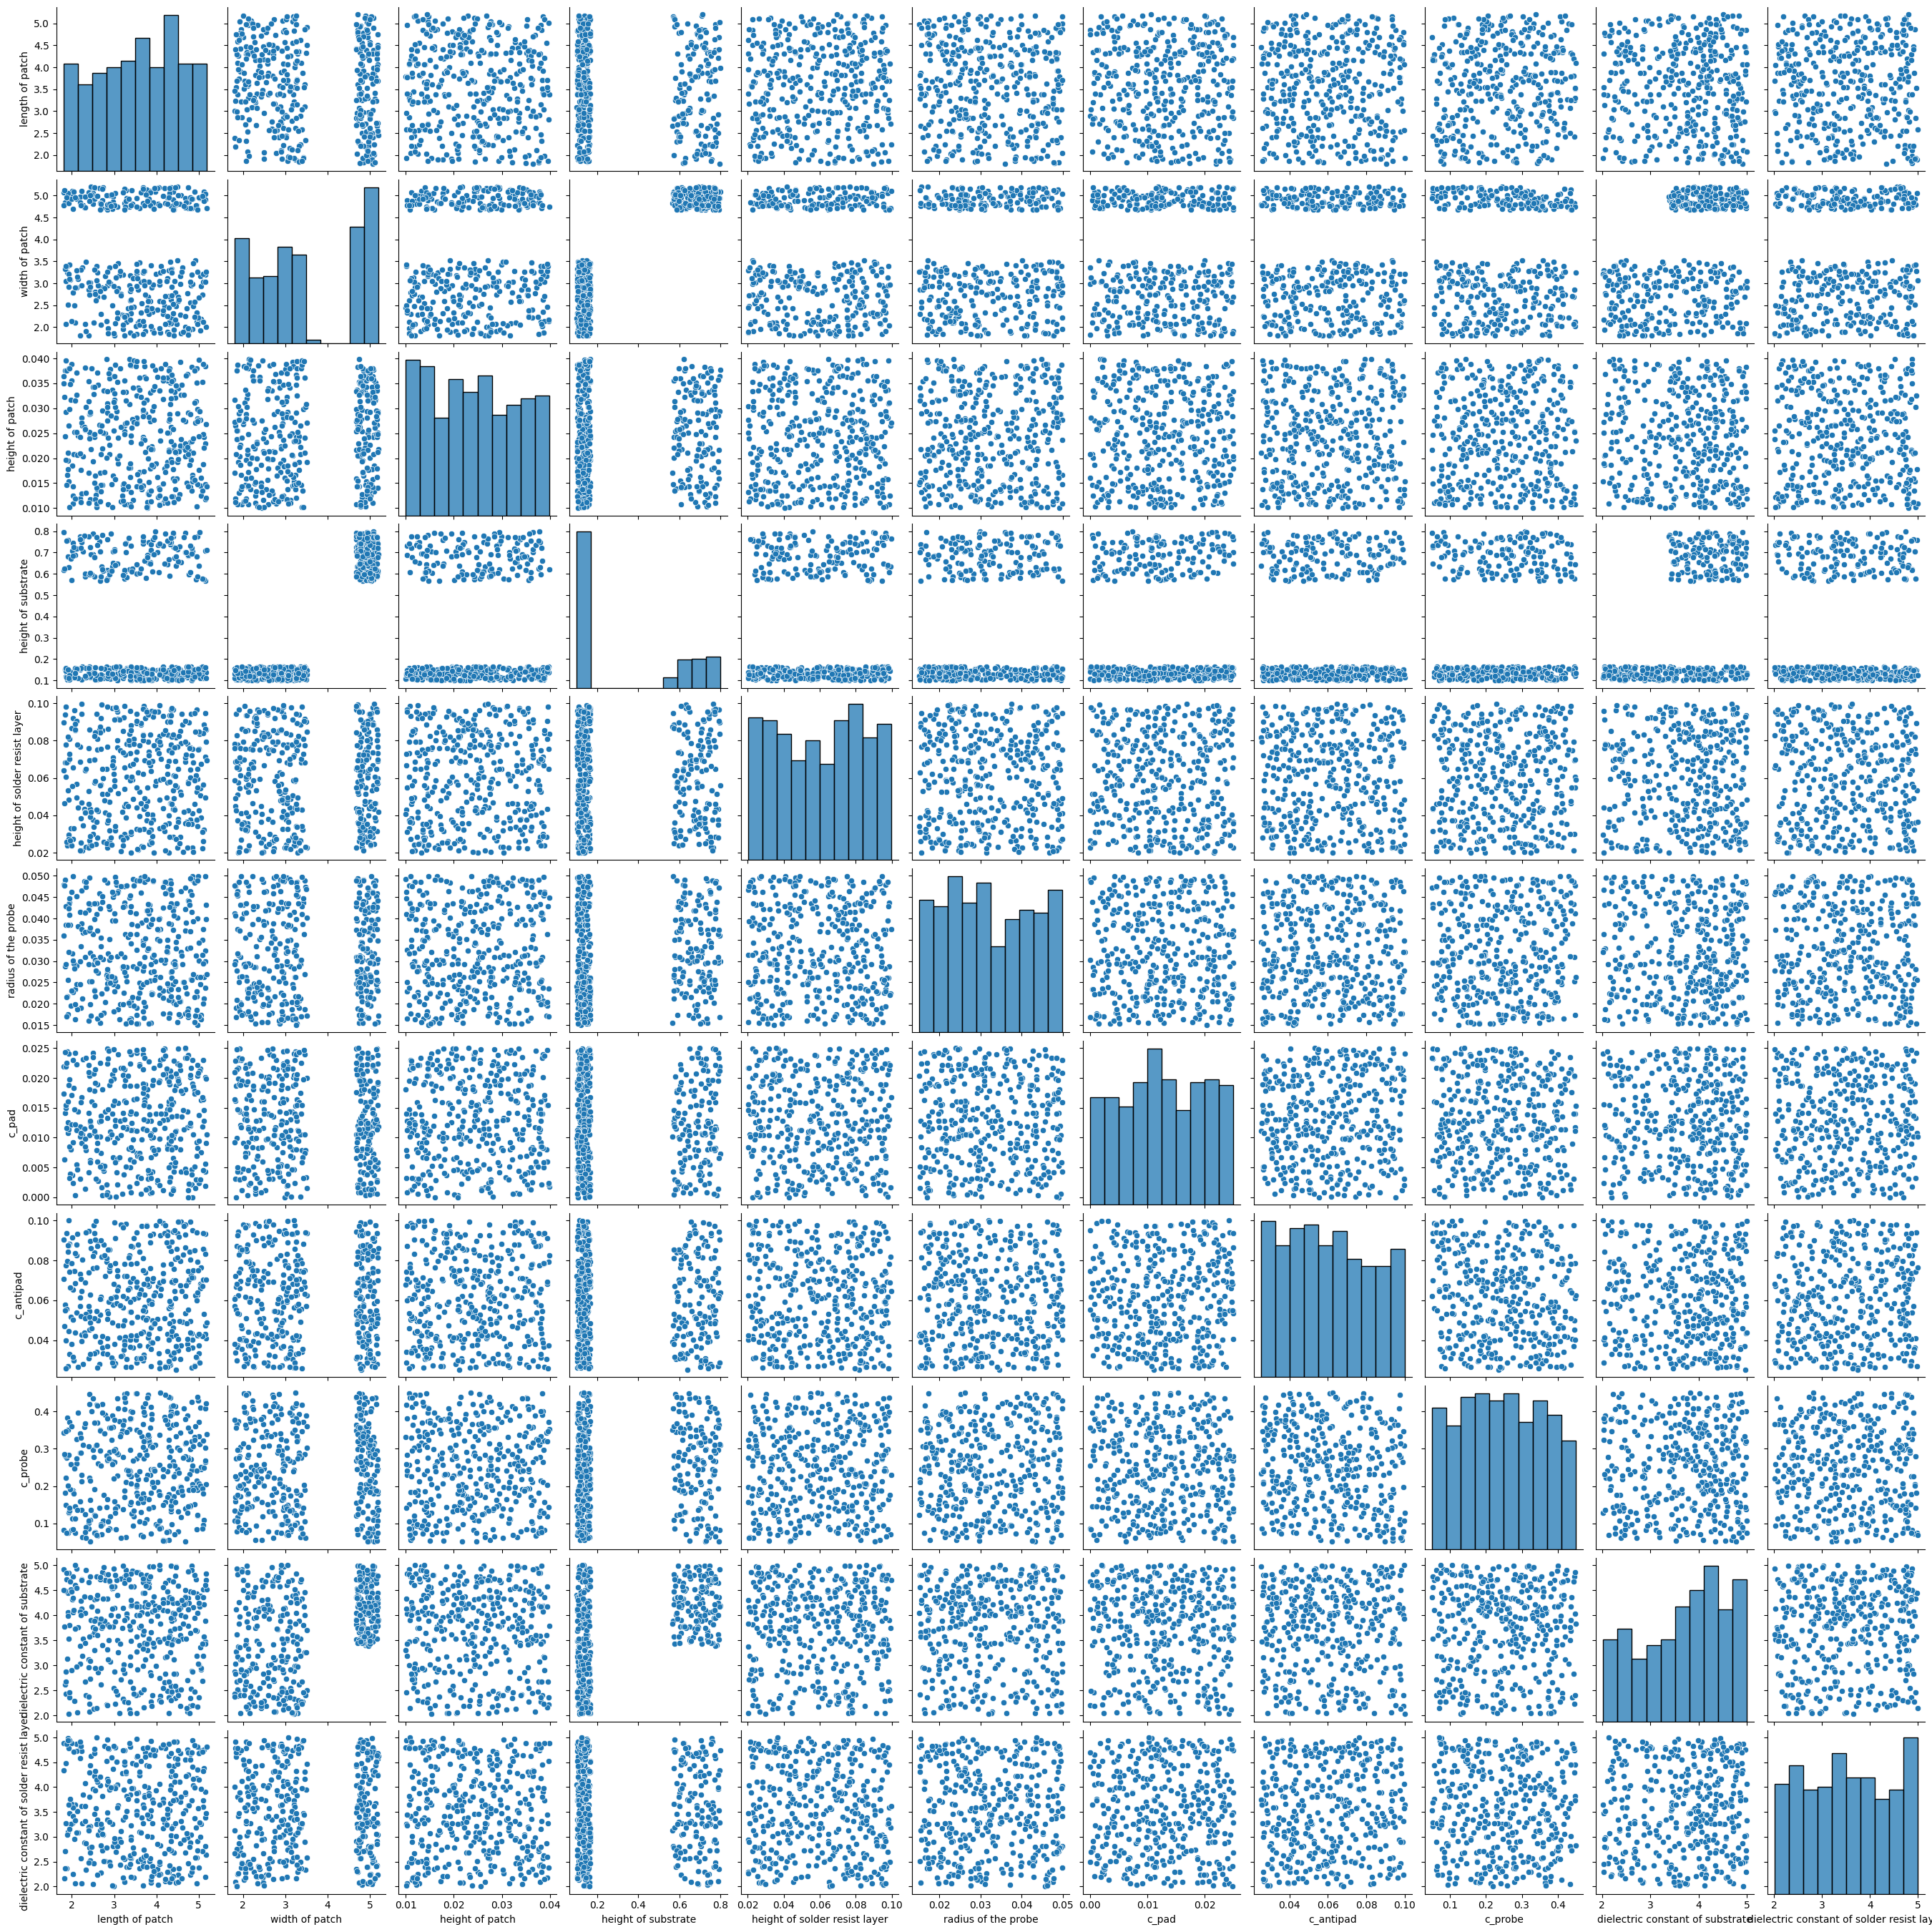

In [139]:
sns.pairplot(data)

<Axes: >

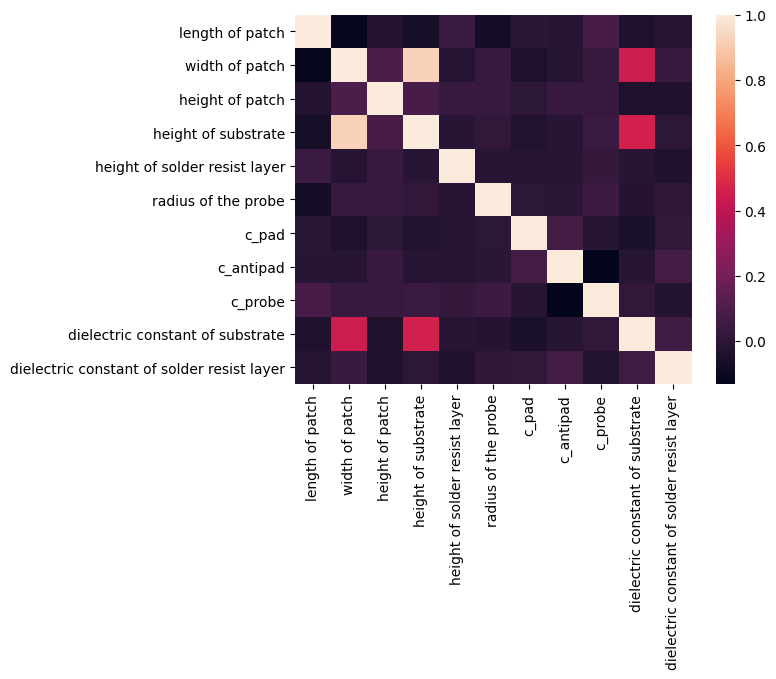

In [19]:
#Visualisation for correlation
sns.heatmap(data.corr())

There is a high correlation between the height of substrate and the width of patch. Let's have a closer look for better understanding for the relationship of these two features.

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='height of substrate', ylabel='width of patch'>

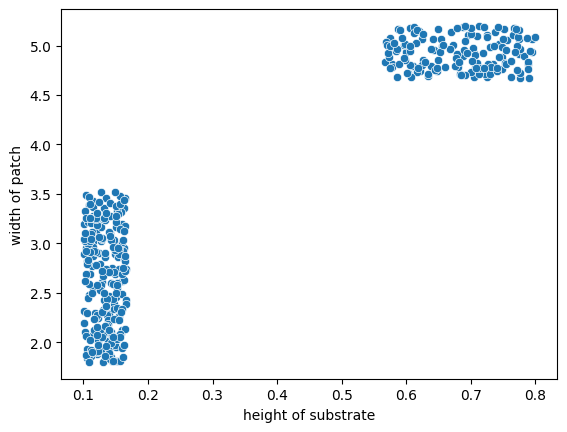

In [166]:
sns.scatterplot(data['height of substrate'], data['width of patch'])

Here we have highly correlated two parameters, the best approach would be the manual feature engineering that we derive meaningful combinations based on our knowledge in the data or in such cases simply one of these features can be elimated.

Since we don't have too many correlated features we may want a general reduction method that transforms features while retaining variance which is PCA.


### Data Analysis on The Target Data

In [48]:
# Load the data
real_S11 = pd.read_csv('hw1_real.csv', header=None)  # Real part of S11
imag_S11 = pd.read_csv('hw1_img.csv', header=None)   # Imaginary part of S11

In [696]:
real_S11[1::].reset_index(drop=True)

0         1         2         3         4         5         6    \
0    0.649471  0.608623  0.563770  0.515485  0.464365  0.411022  0.356056   
1   -0.684443 -0.680926 -0.677355 -0.673727 -0.670041 -0.666296 -0.662491   
2    0.670194  0.678183  0.685886  0.693294  0.700399  0.707191  0.713661   
3   -0.856026 -0.854962 -0.853892 -0.852815 -0.851731 -0.850642 -0.849545   
4   -0.952876 -0.951901 -0.950906 -0.949892 -0.948860 -0.947811 -0.946747   
..        ...       ...       ...       ...       ...       ...       ...   
380  0.712664  0.703017  0.692973  0.682540  0.671727  0.660545  0.649007   
381 -0.304243 -0.267997 -0.229050 -0.187238 -0.142418 -0.094486 -0.043392   
382 -0.985887 -0.986109 -0.986290 -0.986434 -0.986540 -0.986612 -0.986650   
383 -0.696270 -0.692488 -0.688645 -0.684740 -0.680771 -0.676737 -0.672637   
384  0.689258  0.681693  0.674312  0.667233  0.660581  0.654481  0.649055   

          7         8         9    ...       191       192       193  \
0    0.300044  0.243525  0.186992  ... -0.895451 -0.894250 -0.893045   
1   -0.658624 -0.654692 -0.650696  ... -0.835303 -0.832276 -0.829209   
2    0.719799  0.725595  0.731037  ...  0.693171  0.675653  0.656992   
3   -0.848442 -0.847333 -0.846217  ... -0.115205 -0.096197 -0.076456   
4   -0.945668 -0.944575 -0.943469  ... -0.692349 -0.690720 -0.689088   
..        ...       ...       ...  ...       ...       ...       ...   
380  0.637130  0.624930  0.612431  ...  0.548479  0.560256  0.571626   
381  0.010828  0.068016  0.127852  ... -0.898600 -0.897598 -0.896590   
382 -0.986656 -0.986631 -0.986577  ... -0.831635 -0.830253 -0.828863   
383 -0.668469 -0.664232 -0.659923  ... -0.906488 -0.906808 -0.906959   
384  0.644419  0.640675  0.637908  ...  0.536188  0.546594  0.556813   

          194       195       196       197       198       199       200  
0   -0.891835 -0.890620 -0.889402 -0.888178 -0.886951 -0.885718 -0.884482  
1   -0.826105 -0.822965 -0.819791 -0.816584 -0.813346 -0.810078 -0.806782  
2    0.637113  0.615936  0.593384  0.569383  0.543870  0.516796  0.488139  
3   -0.055953 -0.034660 -0.012550  0.010402  0.034219  0.058921  0.084521  
4   -0.687453 -0.685813 -0.684171 -0.682524 -0.680874 -0.679221 -0.677564  
..        ...       ...       ...       ...       ...       ...       ...  
380  0.582598  0.593180  0.603380  0.613208  0.622674  0.631789  0.640562  
381 -0.895579 -0.894562 -0.893540 -0.892514 -0.891483 -0.890447 -0.889406  
382 -0.827464 -0.826056 -0.824640 -0.823215 -0.821781 -0.820338 -0.818886  
383 -0.906948 -0.906784 -0.906473 -0.906022 -0.905439 -0.904728 -0.903896  
384  0.566843  0.576688  0.586347  0.595821  0.605112  0.614219  0.623143  

[385 rows x 201 columns]

#### Relationship With The Input Data

Let's focus on a single frequency point 100 first.

In [747]:
df = pd.merge(data, real_S11[1::].reset_index(drop=True)[[100]], left_index=True, right_index=True)
df

length of patch  width of patch  height of patch  height of substrate  \
0           3.202024        2.288742         0.012514             0.139247   
1           2.107848        2.895504         0.037171             0.149492   
2           3.252113        4.818411         0.025432             0.578834   
3           4.161509        2.294309         0.011058             0.117266   
4           4.820912        2.948325         0.019658             0.163503   
..               ...             ...              ...                  ...   
380         3.950131        5.165856         0.034389             0.770787   
381         2.676373        2.826965         0.011377             0.106795   
382         4.406785        1.814310         0.011187             0.146086   
383         2.540721        3.310983         0.015000             0.135650   
384         2.425315        4.998480         0.029217             0.605634   

     height of solder resist layer  radius of the probe     c_pad  c_antipad  \
0                         0.041757             0.028566  0.000549   0.032403   
1                         0.056775             0.028930  0.005536   0.053647   
2                         0.029972             0.030922  0.020274   0.049845   
3                         0.093223             0.017604  0.001135   0.098610   
4                         0.094337             0.025757  0.021725   0.072813   
..                             ...                  ...       ...        ...   
380                       0.095579             0.025591  0.011430   0.048502   
381                       0.055925             0.042376  0.005102   0.060532   
382                       0.049041             0.040626  0.022849   0.033737   
383                       0.082388             0.043490  0.011130   0.033451   
384                       0.028654             0.037827  0.005896   0.033075   

      c_probe  dielectric constant of substrate  \
0    0.348140                          3.735926   
1    0.326369                          4.929862   
2    0.446639                          4.772670   
3    0.055665                          4.102438   
4    0.272282                          2.531031   
..        ...                               ...   
380  0.241219                          4.099788   
381  0.294000                          4.758303   
382  0.225794                          2.826602   
383  0.370502                          3.303852   
384  0.215161                          4.354493   

     dielectric constant of solder resist layer       100  
0                                      4.278575 -0.975209  
1                                      4.876068  0.522707  
2                                      4.745106  0.386045  
3                                      3.755671 -0.702926  
4                                      3.047553 -0.826891  
..                                          ...       ...  
380                                    4.635040  0.743482  
381                                    4.205687 -0.970511  
382                                    4.908306 -0.930577  
383                                    4.764701  0.470467  
384                                    2.676568 -0.155731  

[385 rows x 12 columns]

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


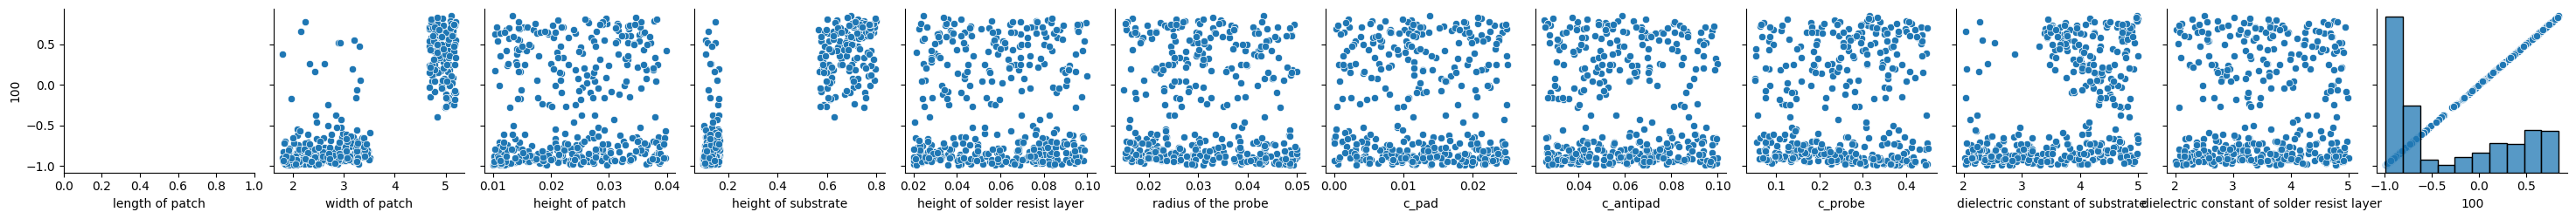

In [742]:
# Relationships between the features and the real part at a single frequency point
sns.pairplot(df, y_vars=[100])

In [743]:
df.corr()[100]

length of patch                              -0.027677
width of patch                                0.830605
height of patch                               0.071386
height of substrate                           0.880056
height of solder resist layer                -0.007944
radius of the probe                          -0.035128
c_pad                                        -0.040812
c_antipad                                    -0.028853
c_probe                                       0.110294
dielectric constant of substrate              0.377078
dielectric constant of solder resist layer    0.033185
100                                           1.000000
Name: 100, dtype: float64

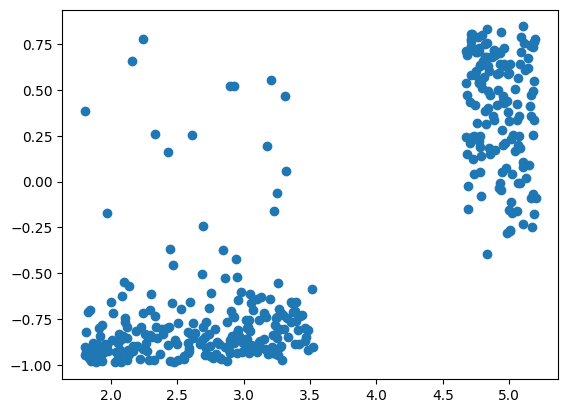

In [744]:
# Relationships between the target (frequency 100) and width of patch feature
plt.scatter(df['width of patch'], df[100])

Eventhough they look correlated, we do not observe a linear relationship.

$  {Magnitude}(S_{11})  = 
{Real Part}^2
 +{Imaginary Part}^2$
​


In [773]:
# Calculate the magnitude of S11
S11_magnitude = np.sqrt(real_S11**2 + imag_S11**2)

In [294]:
S11_target=S11_magnitude[1::].reset_index(drop=True)
S11_target

0         1         2         3         4         5         6    \
0    0.781778  0.783440  0.785795  0.788790  0.792359  0.796433  0.800936   
1    0.986860  0.986669  0.986470  0.986263  0.986048  0.985824  0.985592   
2    0.866883  0.865643  0.864258  0.862724  0.861039  0.859198  0.857199   
3    0.995069  0.995055  0.995041  0.995025  0.995009  0.994991  0.994973   
4    0.985009  0.985235  0.985447  0.985645  0.985831  0.986005  0.986169   
..        ...       ...       ...       ...       ...       ...       ...   
380  0.712967  0.703130  0.692989  0.682545  0.671797  0.660746  0.649395   
381  0.901571  0.894376  0.886417  0.877604  0.867842  0.857028  0.845054   
382  0.985925  0.986114  0.986294  0.986465  0.986629  0.986785  0.986934   
383  0.984282  0.984049  0.983807  0.983558  0.983300  0.983034  0.982758   
384  0.710091  0.701981  0.694257  0.687033  0.680424  0.674545  0.669505   

          7         8         9    ...       191       192       193  \
0    0.805793  0.810930  0.816277  ...  0.988520  0.988551  0.988581   
1    0.985350  0.985100  0.984839  ...  0.945061  0.945880  0.946669   
2    0.855036  0.852705  0.850202  ...  0.865665  0.861328  0.856551   
3    0.994953  0.994933  0.994912  ...  0.935682  0.932755  0.929637   
4    0.986321  0.986464  0.986597  ...  0.988472  0.988418  0.988361   
..        ...       ...       ...  ...       ...       ...       ...   
380  0.637749  0.625814  0.613598  ...  0.675654  0.683714  0.691363   
381  0.831812  0.817200  0.801129  ...  0.990712  0.990714  0.990716   
382  0.987076  0.987212  0.987341  ...  0.987993  0.987889  0.987783   
383  0.982473  0.982179  0.981875  ...  0.911483  0.913052  0.914566   
384  0.665398  0.662302  0.660269  ...  0.818936  0.821178  0.823357   

          194       195       196       197       198       199       200  
0    0.988610  0.988638  0.988664  0.988690  0.988714  0.988737  0.988759  
1    0.947428  0.948158  0.948861  0.949537  0.950188  0.950814  0.951417  
2    0.851268  0.845404  0.838870  0.831564  0.823368  0.814148  0.803752  
3    0.926312  0.922765  0.918978  0.914932  0.910607  0.905982  0.901033  
4    0.988304  0.988244  0.988183  0.988121  0.988057  0.987991  0.987924  
..        ...       ...       ...       ...       ...       ...       ...  
380  0.698625  0.705520  0.712067  0.718286  0.724194  0.729808  0.735143  
381  0.990716  0.990715  0.990713  0.990710  0.990706  0.990701  0.990695  
382  0.987674  0.987561  0.987445  0.987326  0.987204  0.987078  0.986949  
383  0.916027  0.917439  0.918802  0.920118  0.921390  0.922618  0.923805  
384  0.825474  0.827530  0.829524  0.831458  0.833330  0.835142  0.836893  

[385 rows x 201 columns]

Now, let us focus on magnitude at a single frequency point.

In [745]:
df = pd.merge(data, S11_target[[100]], left_index=True, right_index=True)
df

length of patch  width of patch  height of patch  height of substrate  \
0           3.202024        2.288742         0.012514             0.139247   
1           2.107848        2.895504         0.037171             0.149492   
2           3.252113        4.818411         0.025432             0.578834   
3           4.161509        2.294309         0.011058             0.117266   
4           4.820912        2.948325         0.019658             0.163503   
..               ...             ...              ...                  ...   
380         3.950131        5.165856         0.034389             0.770787   
381         2.676373        2.826965         0.011377             0.106795   
382         4.406785        1.814310         0.011187             0.146086   
383         2.540721        3.310983         0.015000             0.135650   
384         2.425315        4.998480         0.029217             0.605634   

     height of solder resist layer  radius of the probe     c_pad  c_antipad  \
0                         0.041757             0.028566  0.000549   0.032403   
1                         0.056775             0.028930  0.005536   0.053647   
2                         0.029972             0.030922  0.020274   0.049845   
3                         0.093223             0.017604  0.001135   0.098610   
4                         0.094337             0.025757  0.021725   0.072813   
..                             ...                  ...       ...        ...   
380                       0.095579             0.025591  0.011430   0.048502   
381                       0.055925             0.042376  0.005102   0.060532   
382                       0.049041             0.040626  0.022849   0.033737   
383                       0.082388             0.043490  0.011130   0.033451   
384                       0.028654             0.037827  0.005896   0.033075   

      c_probe  dielectric constant of substrate  \
0    0.348140                          3.735926   
1    0.326369                          4.929862   
2    0.446639                          4.772670   
3    0.055665                          4.102438   
4    0.272282                          2.531031   
..        ...                               ...   
380  0.241219                          4.099788   
381  0.294000                          4.758303   
382  0.225794                          2.826602   
383  0.370502                          3.303852   
384  0.215161                          4.354493   

     dielectric constant of solder resist layer       100  
0                                      4.278575  0.978879  
1                                      4.876068  0.649184  
2                                      4.745106  0.754555  
3                                      3.755671  0.990385  
4                                      3.047553  0.989076  
..                                          ...       ...  
380                                    4.635040  0.779355  
381                                    4.205687  0.982447  
382                                    4.908306  0.990335  
383                                    4.764701  0.757697  
384                                    2.676568  0.435774  

[385 rows x 12 columns]

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


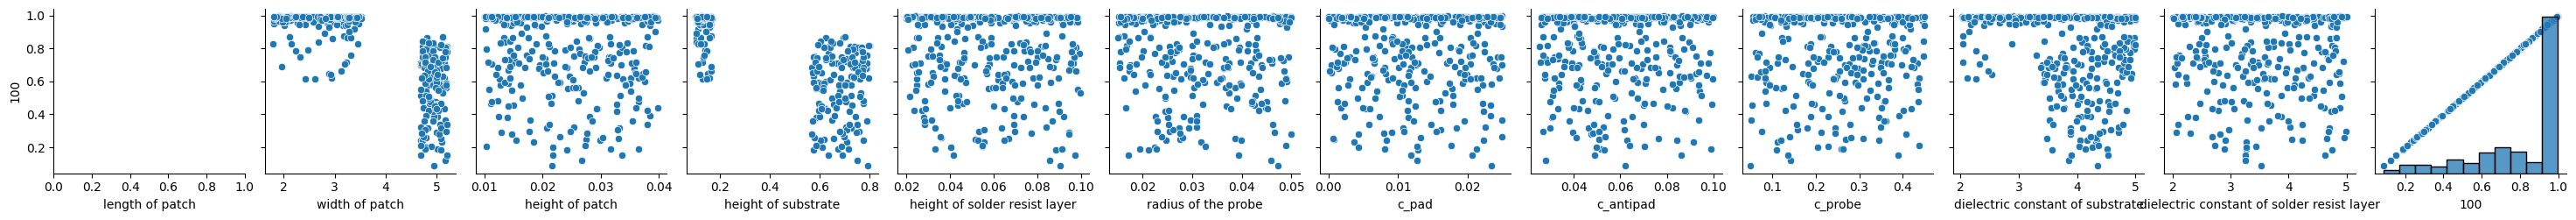

In [746]:
# Relationships between the features and the magnitude at a single frequency point
sns.pairplot(df, y_vars=[100])

Using a single frequency point approach doesn't really give us anything useful.

Let us examine the minimum extreme points.

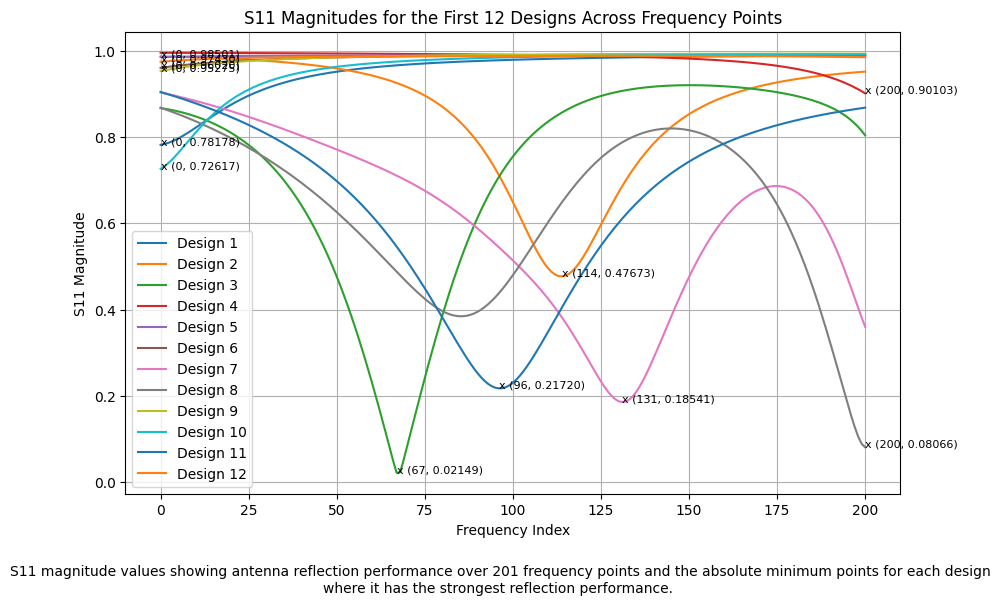

In [370]:
# Plot the magnitude for the first 12 designs
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('S11 Magnitudes for the First 12 Designs Across Frequency Points')
ax.set_xlabel('Frequency Index')
ax.set_ylabel('S11 Magnitude')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "S11 magnitude values showing antenna reflection performance over 201 frequency points and the absolute minimum points for each design where it has the strongest reflection performance. ", 
            ha="center", fontsize=10, wrap=True)

for i in range(1, 13):  # First 12 designs
    plt.plot(S11_magnitude.iloc[i, :], label=f"Design {i}")
    # Add labels to specific points
    min_value = np.min(S11_magnitude.iloc[i, :])
    min_index = np.argmin(S11_magnitude.iloc[i, :])
    plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
ax.legend(loc="best", fontsize=10)


In [119]:
# Find the minimum value and its index for the 3th design
min_value = np.min(S11_magnitude.iloc[3, :])
min_index = np.argmin(S11_magnitude.iloc[3, :])
print(f"Minimum value: {min_value} at index {min_index}")

Minimum value: 0.02148968319005195 at index 67


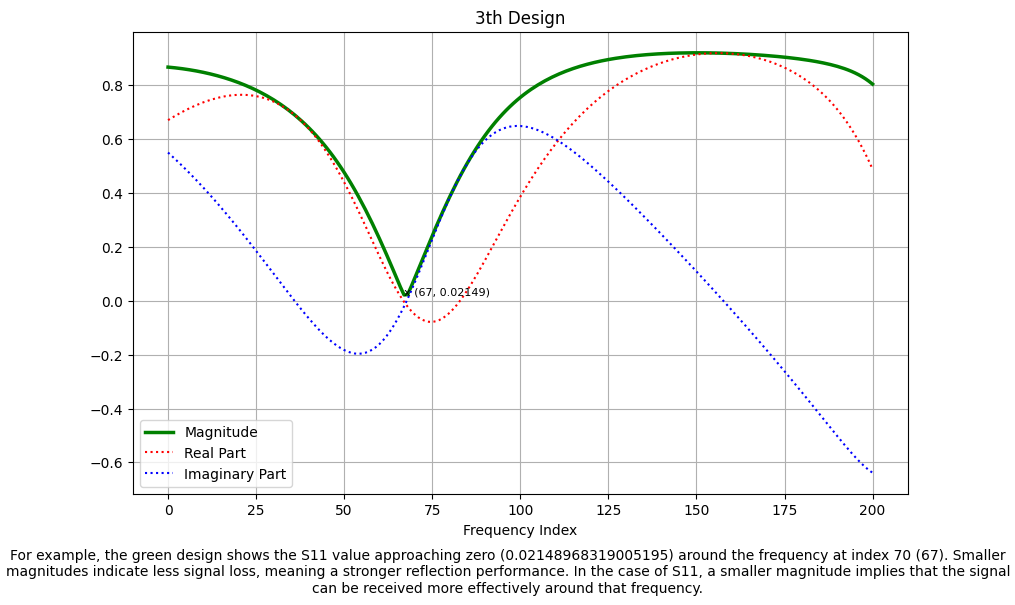

In [173]:
# Plot the magnitude for the first 6 designs
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('3th Design')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "For example, the green design shows the S11 value approaching zero (0.02148968319005195) around the frequency at index 70 (67). Smaller magnitudes indicate less signal loss, meaning a stronger reflection performance. In the case of S11, a smaller magnitude implies that the signal can be received more effectively around that frequency.", 
            ha="center", fontsize=10, wrap=True)
min_value = np.min(S11_magnitude.iloc[3, :])
min_index = np.argmin(S11_magnitude.iloc[3, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_magnitude.iloc[3, :], label="Magnitude", c='g', lw=2.5)
plt.plot(real_S11.iloc[3, :], label="Real Part", c='r',ls=':', lw=1.5)
plt.plot(imag_S11.iloc[3, :], label="Imaginary Part", c='b',ls=':',lw=1.5)

ax.legend(loc="best", fontsize=10)


#### Resonance Indices for The Target Data

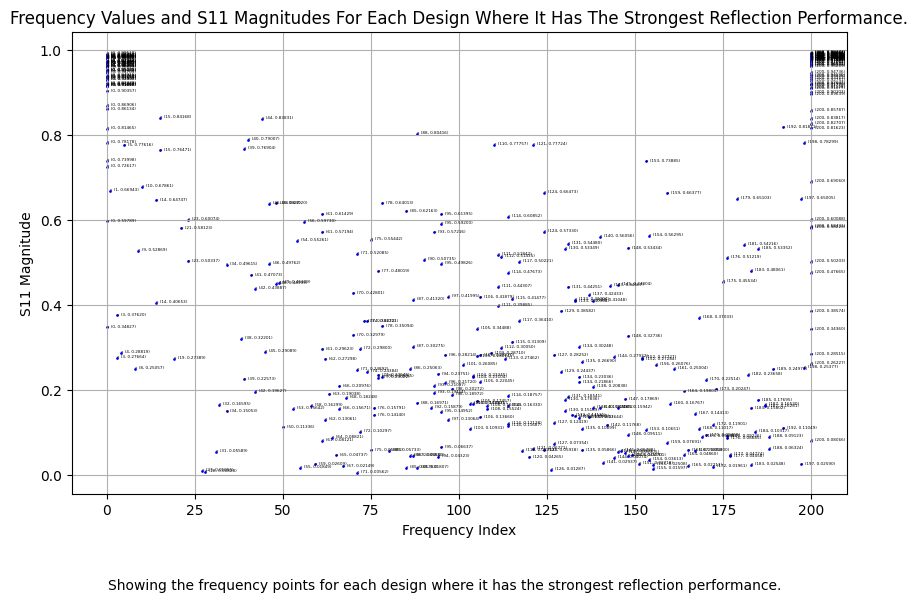

In [ ]:
indices=[]
# Plot all designs' critical frequencies where antenna's performance is the best
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('Frequency Values and S11 Magnitudes For Each Design Where It Has The Strongest Reflection Performance.')
ax.set_xlabel('Frequency Index')
ax.set_ylabel('S11 Magnitude')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "Showing the frequency points for each design where it has the strongest reflection performance. ", 
            ha="center", fontsize=10, wrap=True)
for i in range(1, len(S11_magnitude)): 
    # Add labels to specific points
    min_value = np.min(S11_magnitude.iloc[i, :])
    min_index = np.argmin(S11_magnitude.iloc[i, :])
    plt.scatter(min_index, min_value, c='b', s=0.9)
    plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=3, ha='left')
    indices.append(min_index)


Slecting frequency points 0 and 200 as resonance frequencies, we can significantly reduce the complexity of the regression task. This approach allows you to predict the antenna's performance at the most critical points, rather than trying to model the entire frequency range.

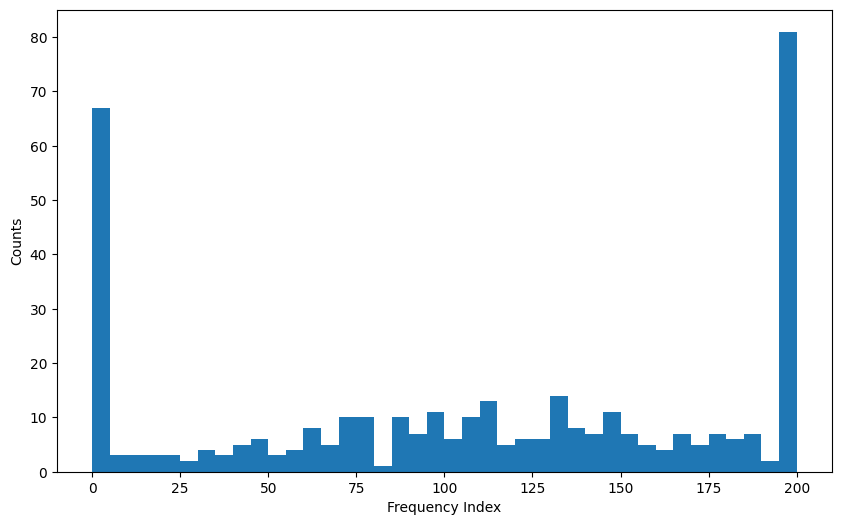

In [359]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Frequency Index')
ax.set_ylabel('Counts')
plt.hist(indices, bins=40);

As an additional resonance point, the frequency value 100 can be selected since it has the 3rd most number of designs that have the peak performance at this frequency value. 

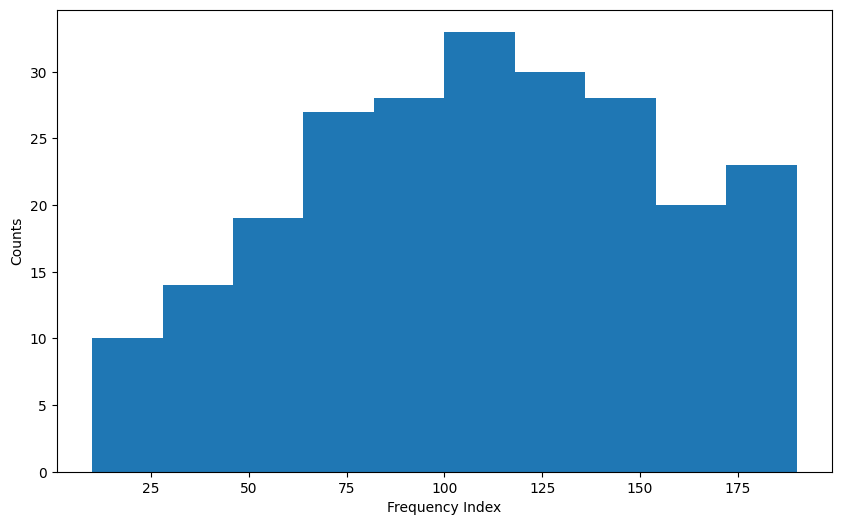

In [369]:
# Omit the frequency points 0-10 and 190-200
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Frequency Index')
ax.set_ylabel('Counts')
plt.hist(indices, bins=10, range=(10, 190));

In [372]:
# Replace with actual indices based on your analysis
key_frequencies = [0, 100, 200]  

#### Resonance Values As The Target

In [798]:
values=[]
values_real=[]
values_imag=[]
for i in range(0, len(S11_magnitude)): 
    # Add labels to specific points
    min_value = np.min(S11_magnitude.iloc[i, :])
    values.append(min_value)
    min_value = np.min(real_S11[1::].reset_index(drop=True).iloc[i, :])
    values_real.append(min_value)
    min_value = np.min(imag_S11[1::].reset_index(drop=True).iloc[i, :])
    values_imag.append(min_value)


In [800]:
values_df=pd.DataFrame(values, columns=["resonance"])

In [802]:
values_real_df=pd.DataFrame(values_real, columns=["resonance_real"])

In [801]:
values_imag_df=pd.DataFrame(values_imag, columns=["resonance_imag"])

In [805]:
#### Adding Resonance Values As The Target
df = pd.merge(data, values_df , left_index=True, right_index=True)
df = pd.merge(df, values_real_df , left_index=True, right_index=True)
df = pd.merge(df, values_imag_df , left_index=True, right_index=True)
df

length of patch  width of patch  height of patch  height of substrate  \
0           3.202024        2.288742         0.012514             0.139247   
1           2.107848        2.895504         0.037171             0.149492   
2           3.252113        4.818411         0.025432             0.578834   
3           4.161509        2.294309         0.011058             0.117266   
4           4.820912        2.948325         0.019658             0.163503   
..               ...             ...              ...                  ...   
380         3.950131        5.165856         0.034389             0.770787   
381         2.676373        2.826965         0.011377             0.106795   
382         4.406785        1.814310         0.011187             0.146086   
383         2.540721        3.310983         0.015000             0.135650   
384         2.425315        4.998480         0.029217             0.605634   

     height of solder resist layer  radius of the probe     c_pad  c_antipad  \
0                         0.041757             0.028566  0.000549   0.032403   
1                         0.056775             0.028930  0.005536   0.053647   
2                         0.029972             0.030922  0.020274   0.049845   
3                         0.093223             0.017604  0.001135   0.098610   
4                         0.094337             0.025757  0.021725   0.072813   
..                             ...                  ...       ...        ...   
380                       0.095579             0.025591  0.011430   0.048502   
381                       0.055925             0.042376  0.005102   0.060532   
382                       0.049041             0.040626  0.022849   0.033737   
383                       0.082388             0.043490  0.011130   0.033451   
384                       0.028654             0.037827  0.005896   0.033075   

      c_probe  dielectric constant of substrate  \
0    0.348140                          3.735926   
1    0.326369                          4.929862   
2    0.446639                          4.772670   
3    0.055665                          4.102438   
4    0.272282                          2.531031   
..        ...                               ...   
380  0.241219                          4.099788   
381  0.294000                          4.758303   
382  0.225794                          2.826602   
383  0.370502                          3.303852   
384  0.215161                          4.354493   

     dielectric constant of solder resist layer  resonance  resonance_real  \
0                                      4.278575   0.781778       -0.976053   
1                                      4.876068   0.476733       -0.887572   
2                                      4.745106   0.021490       -0.078516   
3                                      3.755671   0.901033       -0.856026   
4                                      3.047553   0.985009       -0.952876   
..                                          ...        ...             ...   
380                                    4.635040   0.167674        0.159942   
381                                    4.205687   0.581230       -0.974088   
382                                    4.908306   0.985925       -0.986656   
383                                    4.764701   0.573305       -0.906959   
384                                    2.676568   0.398853       -0.421003   

     resonance_imag  
0         -0.840042  
1         -0.544274  
2         -0.638543  
3          0.507327  
4          0.249540  
..              ...  
380       -0.231896  
381       -0.708839  
382       -0.008603  
383       -0.637722  
384       -0.510269  

[385 rows x 14 columns]

In [806]:
df.corr()['resonance']

length of patch                               0.088859
width of patch                               -0.719391
height of patch                              -0.057423
height of substrate                          -0.727314
height of solder resist layer                 0.006547
radius of the probe                           0.016414
c_pad                                         0.076387
c_antipad                                     0.018615
c_probe                                       0.044486
dielectric constant of substrate             -0.498250
dielectric constant of solder resist layer   -0.107778
resonance                                     1.000000
resonance_real                               -0.698963
resonance_imag                                0.411778
Name: resonance, dtype: float64

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


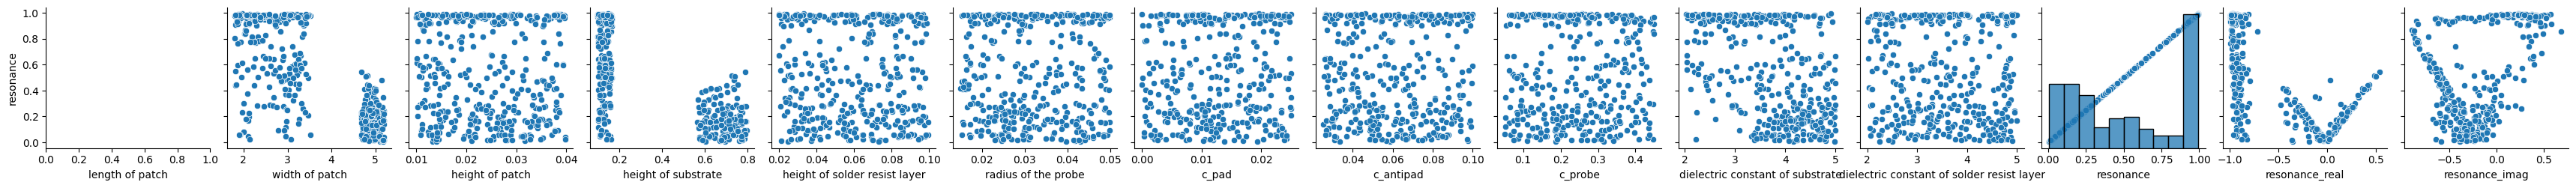

In [807]:
# Relationships between the features and the resonance values
sns.pairplot(df, y_vars=['resonance'])

In [808]:
df.corr()['resonance_real']

length of patch                               0.009014
width of patch                                0.894428
height of patch                               0.074876
height of substrate                           0.960081
height of solder resist layer                 0.004733
radius of the probe                          -0.049564
c_pad                                        -0.028054
c_antipad                                     0.000707
c_probe                                       0.007350
dielectric constant of substrate              0.401108
dielectric constant of solder resist layer    0.012930
resonance                                    -0.698963
resonance_real                                1.000000
resonance_imag                               -0.187013
Name: resonance_real, dtype: float64

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


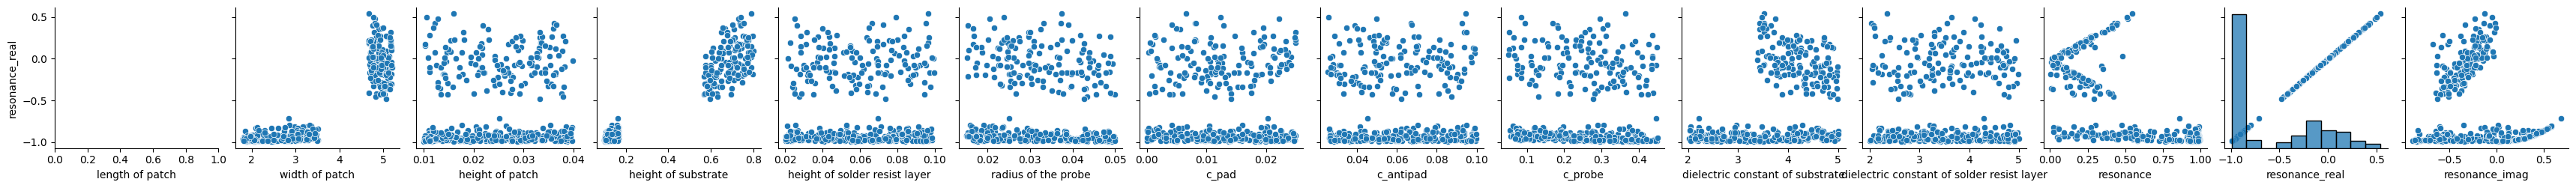

In [810]:
# Relationships between the features and the resonance values (real part)
sns.pairplot(df, y_vars=['resonance_real'])

In [809]:
df.corr()['resonance_imag']

length of patch                               0.057338
width of patch                               -0.197444
height of patch                               0.065604
height of substrate                          -0.267361
height of solder resist layer                 0.023461
radius of the probe                          -0.139563
c_pad                                         0.081723
c_antipad                                     0.152817
c_probe                                      -0.391245
dielectric constant of substrate             -0.203338
dielectric constant of solder resist layer   -0.009696
resonance                                     0.411778
resonance_real                               -0.187013
resonance_imag                                1.000000
Name: resonance_imag, dtype: float64

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


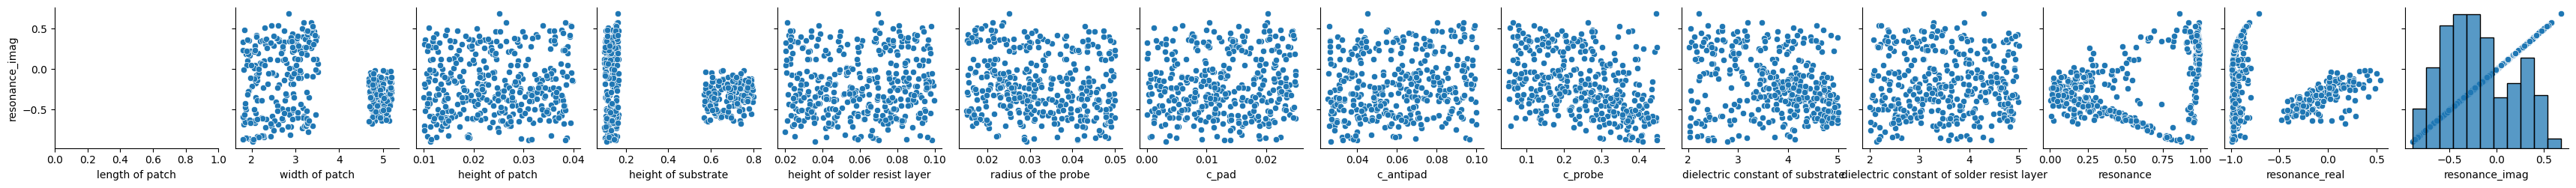

In [811]:
# Relationships between the features and the resonance values (imaginary part)
sns.pairplot(df, y_vars=['resonance_imag'])

## PCA with Scikit-Learn


In [ ]:
## Scikit-Learn Implementations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Principle Component Analysis on The Input Data

In [219]:
#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
#Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

/Users/eren/micromamba/envs/Py_ML_DS_env/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


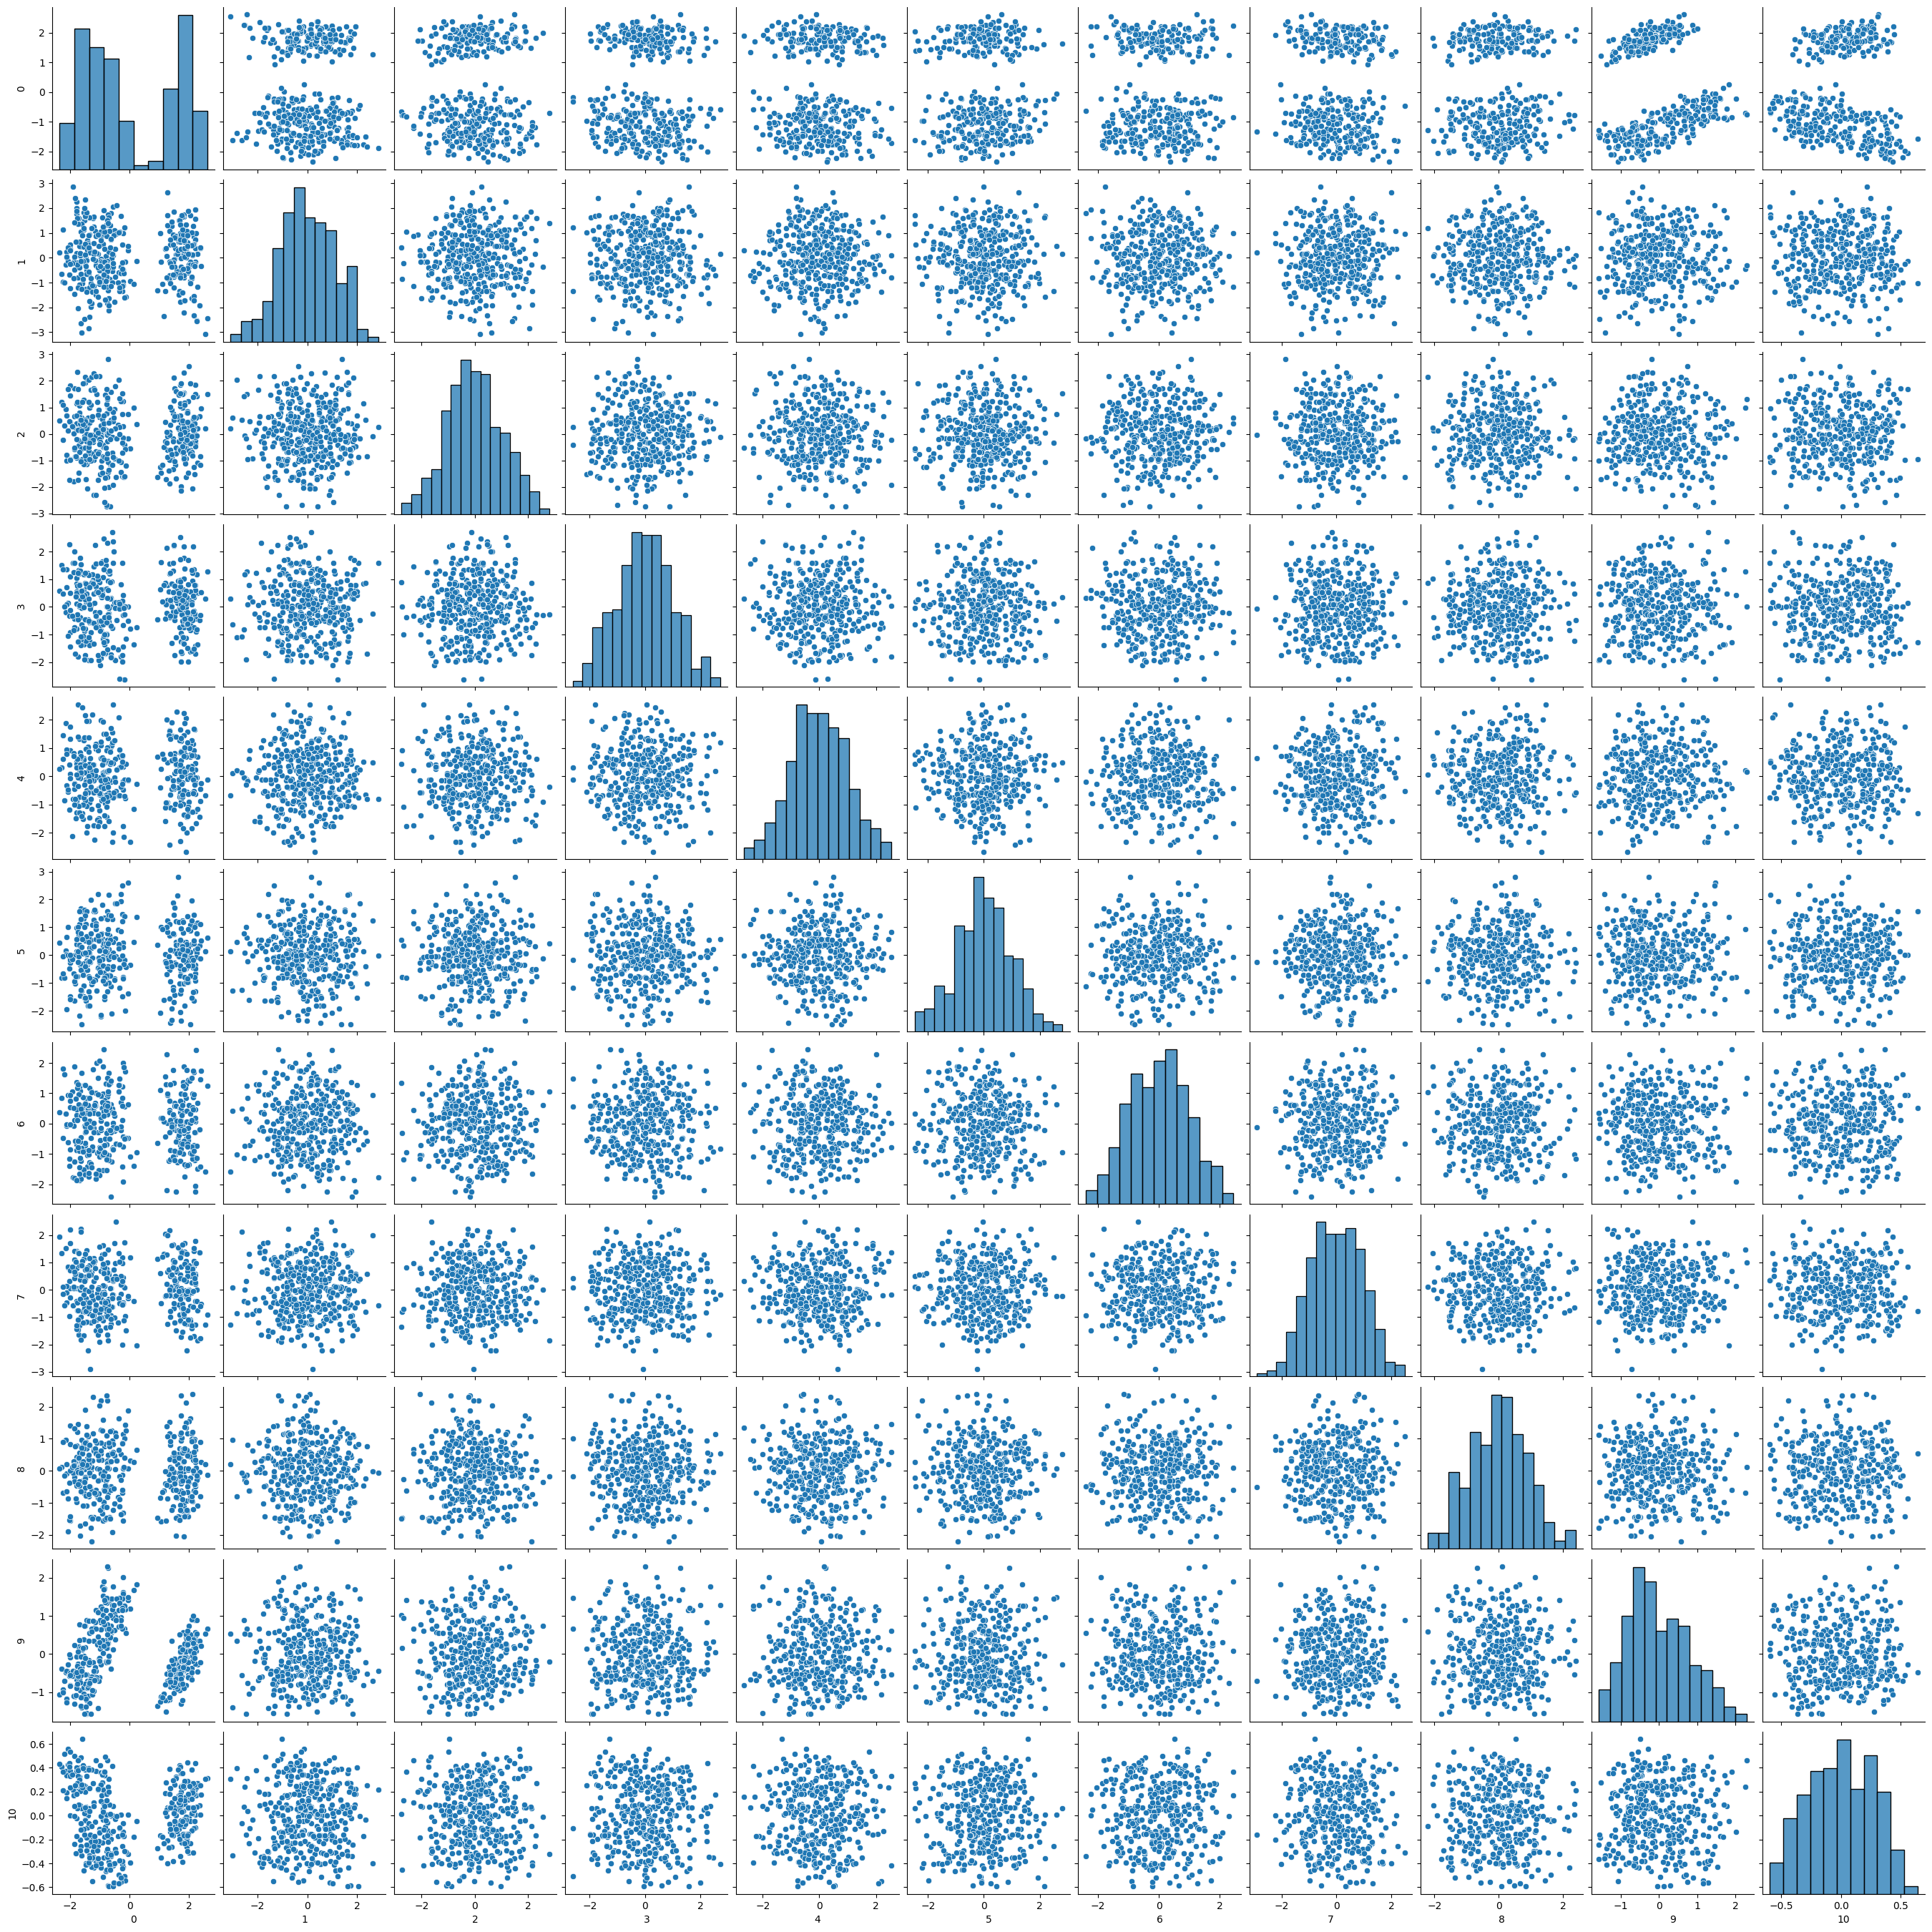

In [222]:
#Pairplot for 11 principle components
pc_df = pd.DataFrame(principal_components)
sns.pairplot(pc_df)

In [220]:
#Explained variance ratio per principal component.
pca.explained_variance_ratio_

array([0.20715348, 0.11070825, 0.10003384, 0.09607237, 0.09187079,
       0.08845826, 0.08565904, 0.08165053, 0.07339863, 0.05830268,
       0.00669213])

In [221]:
# Cumulative sum of the explained variance ratio
cum_explained_variance= pca.explained_variance_ratio_.cumsum()
cum_explained_variance

array([0.20715348, 0.31786173, 0.41789557, 0.51396794, 0.60583873,
       0.69429699, 0.77995603, 0.86160656, 0.93500519, 0.99330787,
       1.        ])

In [273]:
pd.DataFrame({"Explained Variance Ratio": pca.explained_variance_ratio_, "Cumulative Explained Variance Ratio":cum_explained_variance}, index=[f"Comp.{i+1}" for i in (pc_df.columns)])

Explained Variance Ratio  Cumulative Explained Variance Ratio
Comp.1                   0.207153                             0.207153
Comp.2                   0.110708                             0.317862
Comp.3                   0.100034                             0.417896
Comp.4                   0.096072                             0.513968
Comp.5                   0.091871                             0.605839
Comp.6                   0.088458                             0.694297
Comp.7                   0.085659                             0.779956
Comp.8                   0.081651                             0.861607
Comp.9                   0.073399                             0.935005
Comp.10                  0.058303                             0.993308
Comp.11                  0.006692                             1.000000

 Observe that, when we take only the first eight principal components we lose more than 10% of explained variance during dimensionality reduction.

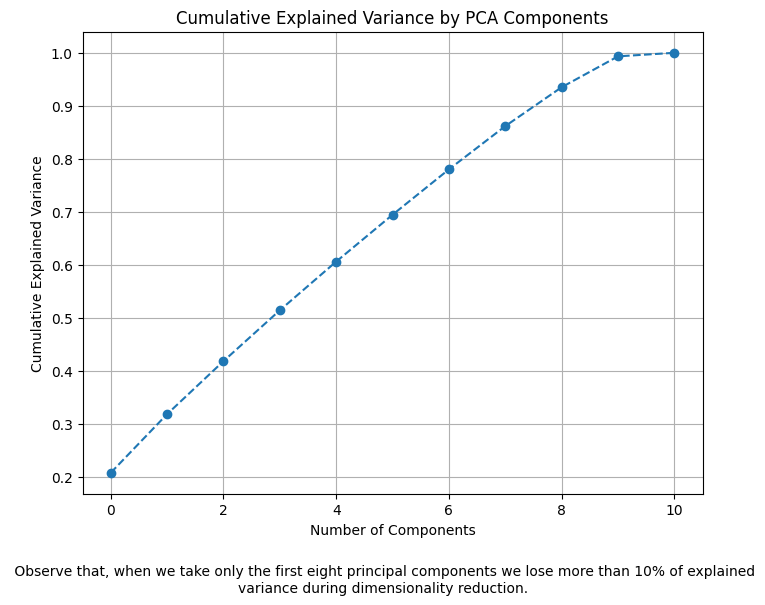

In [268]:
#Plot the cumulative sum of the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cum_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figtext(0.5, -0.05, " Observe that, when we take only the first eight principal components we lose more than 10% of explained variance during dimensionality reduction.", 
            ha="center", fontsize=10, wrap=True)
plt.grid(True)
plt.show()


In [272]:
loadings_df = pd.DataFrame(pca.components_, columns=data.columns, index=[f"Comp.{i+1}" for i in (pc_df.columns)])
loadings_df

length of patch  width of patch  height of patch  \
Comp.1         -0.101327        0.624178         0.071054   
Comp.2          0.315409       -0.009718         0.055716   
Comp.3         -0.369645        0.040766         0.620460   
Comp.4          0.376883        0.039631         0.392974   
Comp.5          0.409833        0.012169         0.017701   
Comp.6          0.073314       -0.032326         0.069714   
Comp.7         -0.253331        0.000413        -0.490098   
Comp.8          0.454266        0.022090        -0.317943   
Comp.9         -0.406238       -0.040157        -0.216559   
Comp.10        -0.036934       -0.328516         0.243013   
Comp.11        -0.036141       -0.704172         0.006071   

         height of substrate  height of solder resist layer  \
Comp.1              0.624137                      -0.021049   
Comp.2              0.018824                       0.266259   
Comp.3              0.016441                       0.086417   
Comp.4              0.076518                       0.510652   
Comp.5              0.028012                      -0.124629   
Comp.6             -0.060565                       0.459841   
Comp.7              0.002837                       0.647199   
Comp.8              0.059481                      -0.110408   
Comp.9             -0.038186                       0.040184   
Comp.10            -0.305362                      -0.027430   
Comp.11             0.708004                      -0.004432   

         radius of the probe     c_pad  c_antipad   c_probe  \
Comp.1              0.025997 -0.054228  -0.018720  0.039213   
Comp.2              0.002815 -0.265990  -0.559499  0.564753   
Comp.3              0.548381  0.144827   0.088323  0.093131   
Comp.4             -0.454397  0.177533   0.373926 -0.151004   
Comp.5              0.218986  0.580059   0.127759  0.487544   
Comp.6              0.304908 -0.547579   0.172140  0.016285   
Comp.7              0.212779  0.429976  -0.138146 -0.102528   
Comp.8              0.491478 -0.174386   0.415883 -0.129279   
Comp.9             -0.240280 -0.140321   0.548589  0.618694   
Comp.10             0.080764  0.049041  -0.000574  0.000912   
Comp.11             0.010532 -0.010954  -0.006460 -0.008289   

         dielectric constant of substrate  \
Comp.1                           0.445100   
Comp.2                          -0.012829   
Comp.3                          -0.256167   
Comp.4                          -0.022492   
Comp.5                           0.012254   
Comp.6                           0.027772   
Comp.7                           0.097290   
Comp.8                           0.053226   
Comp.9                           0.031927   
Comp.10                          0.849121   
Comp.11                         -0.018678   

         dielectric constant of solder resist layer  
Comp.1                                     0.038422  
Comp.2                                    -0.350944  
Comp.3                                    -0.255339  
Comp.4                                    -0.184975  
Comp.5                                     0.420314  
Comp.6                                     0.591708  
Comp.7                                    -0.086813  
Comp.8                                    -0.460296  
Comp.9                                    -0.145645  
Comp.10                                   -0.087887  
Comp.11                                    0.028625

Recall first component!

<div>
    <p>
        Comp.2 = (length of patch &times; 0.315409) + 
        (width of patch &times; -0.009718) + 
        (height of patch &times; 0.055716) + 
        (height of substrate &times; 0.018824) + 
        (height of solder resist layer &times; 0.266259) + 
        (radius of the probe &times; 0.002815) + 
        (c_pad &times; -0.265990) + 
        (c_antipad &times; -0.559499) + 
        (c_probe &times; 0.564753) + 
        (dielectric constant of substrate &times; -0.012829) + 
        (dielectric constant of solder resist layer &times; -0.350944)
    </p>
</div>


### Principle Component Analysis on The Target Data

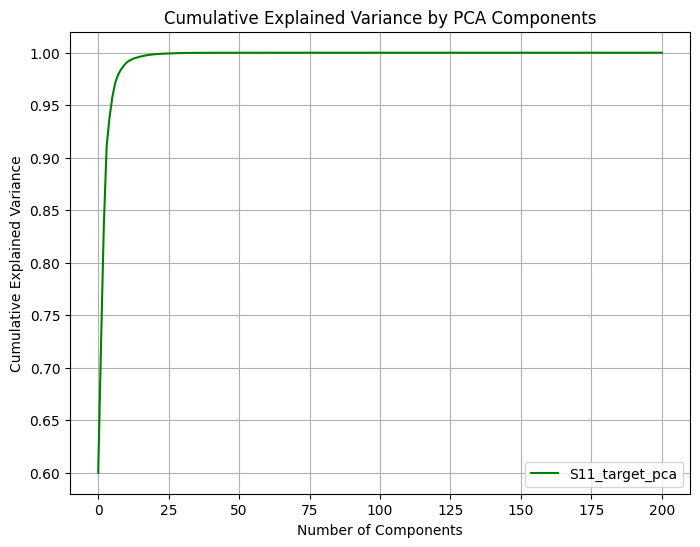

In [537]:
#Scale the data
scaler1 = StandardScaler()
scaled_data_s11 = scaler1.fit_transform(S11_target)
plt.figure(figsize=(8, 6))
#Apply PCA for s11
pca = PCA()
pca.fit(scaled_data_s11)
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_.cumsum(), label="S11_target_pca", c='g')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend(loc="best", fontsize=10)
plt.show()

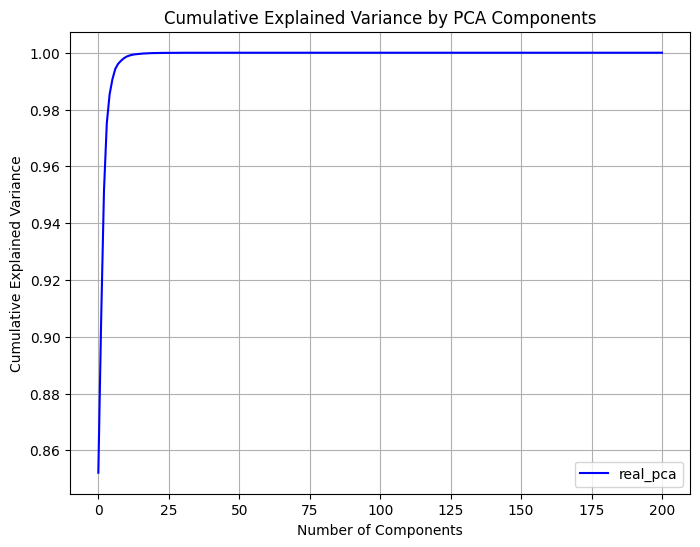

In [539]:
#Scale the data
scaler2 = StandardScaler()
scaled_data_real = scaler2.fit_transform(real_S11[1::].reset_index(drop=True))
#Apply PCA for real part
pca = PCA()
pca.fit(scaled_data_real)
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_.cumsum() , label="real_pca", c='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend(loc="best", fontsize=10)
plt.show()

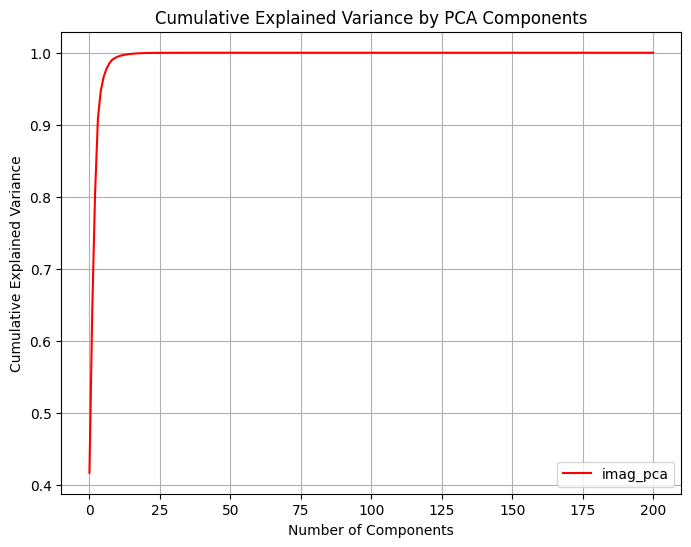

In [540]:
#Scale the data
scaler3 = StandardScaler()
scaled_data_imag = scaler3.fit_transform(imag_S11[1::].reset_index(drop=True))
#Apply PCA for real part
pca = PCA()
pca.fit(scaled_data_imag)
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_.cumsum() , label="imag_pca", c='r')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend(loc="best", fontsize=10)
plt.show()

In [541]:
pd.DataFrame({"Explained Variance Ratio": pca.explained_variance_ratio_, "Cumulative Explained Variance Ratio":pca.explained_variance_ratio_.cumsum()}, index=[f"Comp.{i+1}" for i in (S11_target.columns)])

Explained Variance Ratio  Cumulative Explained Variance Ratio
Comp.1                4.167438e-01                             0.416744
Comp.2                2.269942e-01                             0.643738
Comp.3                1.619304e-01                             0.805668
Comp.4                1.030973e-01                             0.908766
Comp.5                3.782842e-02                             0.946594
...                            ...                                  ...
Comp.197              1.933790e-33                             1.000000
Comp.198              1.801411e-33                             1.000000
Comp.199              1.772045e-33                             1.000000
Comp.200              1.561350e-33                             1.000000
Comp.201              1.053047e-33                             1.000000

[201 rows x 2 columns]

In [542]:
scaled_data_real

array([[ 1.06574433,  1.01453916,  0.95853213, ..., -1.03117649,
        -1.03066207, -1.03006856],
       [-0.64499146, -0.6398629 , -0.63457663, ..., -0.9168636 ,
        -0.91321435, -0.90942875],
       [ 1.09232153,  1.10378008,  1.11527939, ...,  1.19098874,
         1.14704934,  1.10111919],
       ...,
       [-1.0315917 , -1.03139119, -1.03112695, ..., -0.92996344,
        -0.9291446 , -0.92822175],
       [-0.66015982, -0.65469567, -0.64906876, ..., -1.05988994,
        -1.0601784 , -1.06021103],
       [ 1.11677049,  1.1082833 ,  1.1004233 , ...,  1.28610211,
         1.29831994,  1.31073178]])

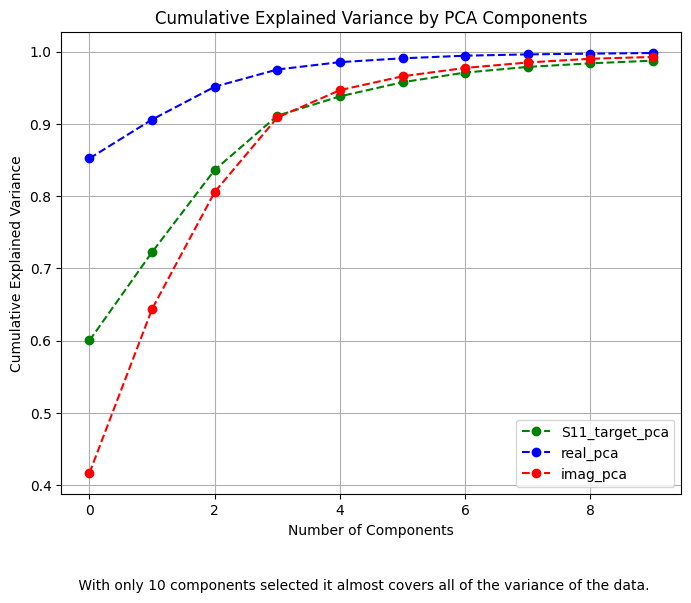

In [552]:
plt.figure(figsize=(8, 6))
#Apply PCA.
pca1 = PCA(10)
s11_target_pca= pca1.fit(scaled_data_s11)
# Plot the explained variance ratio
plt.plot(s11_target_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="S11_target_pca", c="g")
#Apply PCA.
pca2 = PCA(10)
real_pca=pca2.fit(scaled_data_real)
# Plot the explained variance ratio
plt.plot(real_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="real_pca",c="b")
#Apply PCA.
pca3 = PCA(10)
imag_pca=pca3.fit(scaled_data_imag)
# Plot the explained variance ratio
plt.plot(imag_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="imag_pca",c="r")

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figtext(0.5, -0.05, " With only 10 components selected it almost covers all of the variance of the data.", 
            ha="center", fontsize=10, wrap=True)
plt.grid(True)
plt.legend(loc="best", fontsize=10)
plt.show()

In [548]:
# Get the principle components (transformed)
S11_target_pca = pca1.fit_transform(scaled_data_s11)
Real_pca = pca2.fit_transform(scaled_data_real)
Imag_pca = pca3.fit_transform(scaled_data_imag)

In [549]:
# Reconstruct the original data from the principle components
S11_reconstructed = scaler1.inverse_transform(pca1.inverse_transform(S11_target_pca))
real_reconstructed = scaler2.inverse_transform(pca2.inverse_transform(Real_pca))
imag_reconstructed = scaler3.inverse_transform(pca3.inverse_transform(Imag_pca))

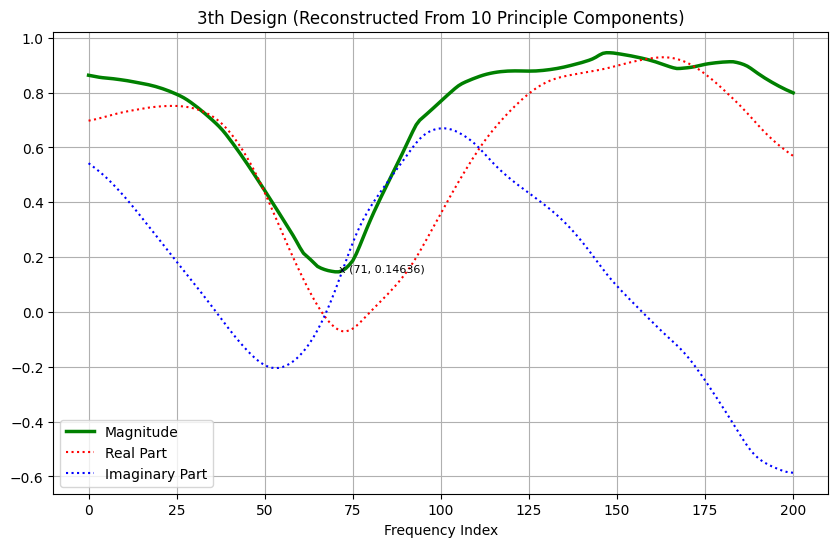

In [551]:
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('3th Design (Reconstructed From 10 Principle Components)')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "", 
            ha="center", fontsize=10, wrap=True)
min_value = np.min(S11_reconstructed[2, :])
min_index = np.argmin(S11_reconstructed[2, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_reconstructed[2, :], label="Magnitude", c='g', lw=2.5)
plt.plot(real_reconstructed[2, :], label="Real Part", c='r',ls=':', lw=1.5)
plt.plot(imag_reconstructed[2, :], label="Imaginary Part", c='b',ls=':',lw=1.5)

ax.legend(loc="best", fontsize=10)


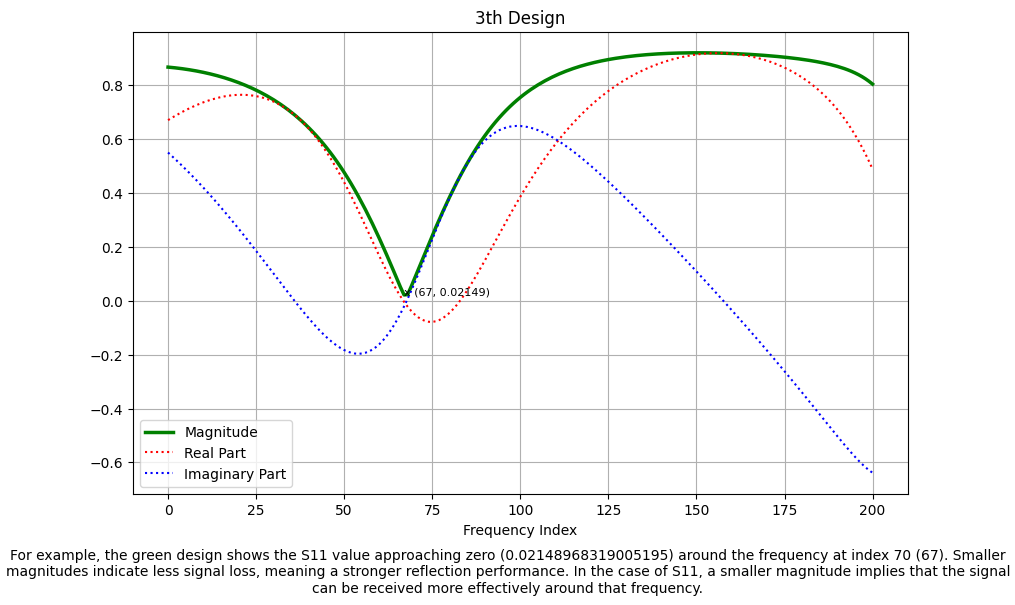

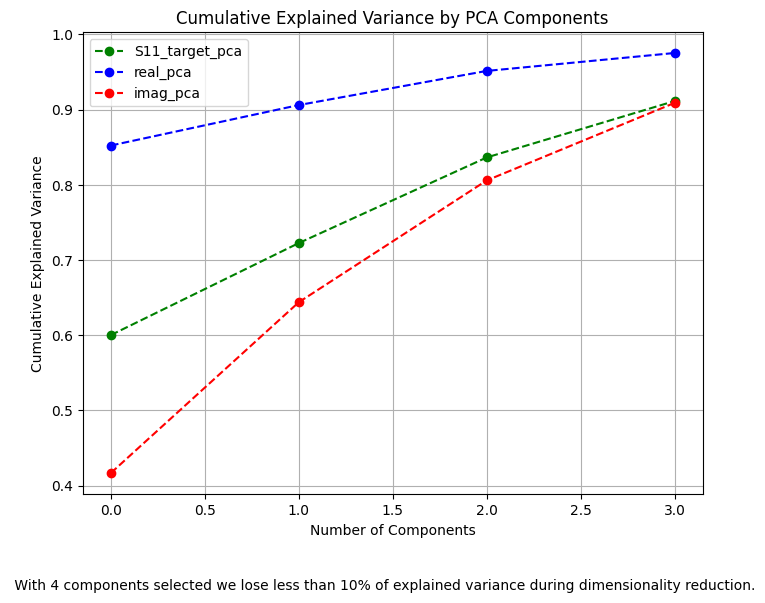

In [553]:
plt.figure(figsize=(8, 6))
#Apply PCA to get at least 90% explained variance.
pca1 = PCA(0.9)
s11_target_pca= pca1.fit(scaled_data_s11)
# Plot the explained variance ratio
plt.plot(s11_target_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="S11_target_pca", c="g")
#Apply PCA.
pca2 = PCA(4)
real_pca=pca2.fit(scaled_data_real)
# Plot the explained variance ratio
plt.plot(real_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="real_pca",c="b")
#Apply PCA.
pca3 = PCA(4)
imag_pca=pca3.fit(scaled_data_imag)
# Plot the explained variance ratio
plt.plot(imag_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', label="imag_pca",c="r")

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figtext(0.5, -0.05, " With 4 components selected we lose less than 10% of explained variance during dimensionality reduction.", 
            ha="center", fontsize=10, wrap=True)
plt.grid(True)
plt.legend(loc="best", fontsize=10)
plt.show()

In [554]:
# Get the principle components (transformed)
S11_target_pca = pca1.fit_transform(scaled_data_s11)
Real_pca = pca2.fit_transform(scaled_data_real)
Imag_pca = pca3.fit_transform(scaled_data_imag)

In [555]:
# Reconstruct the original data from the principle components
S11_reconstructed = scaler1.inverse_transform(pca1.inverse_transform(S11_target_pca))
real_reconstructed = scaler2.inverse_transform(pca2.inverse_transform(Real_pca))
imag_reconstructed = scaler3.inverse_transform(pca3.inverse_transform(Imag_pca))

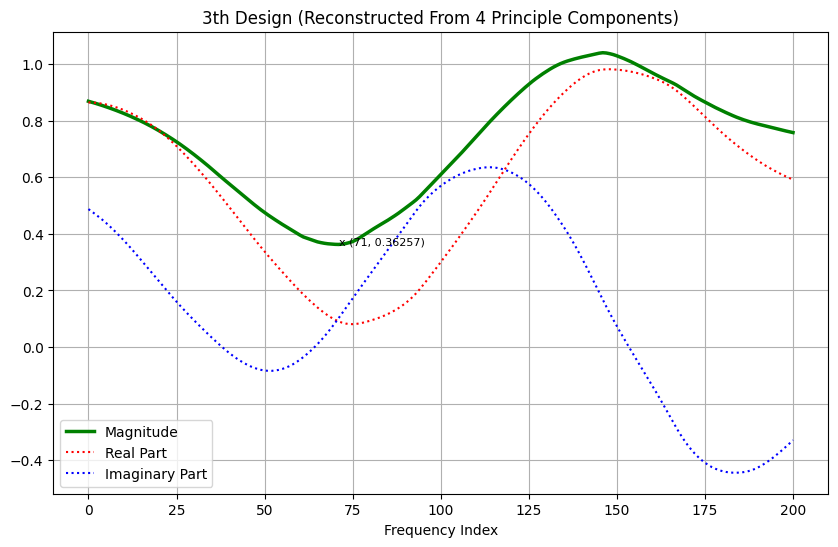

In [557]:
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('3th Design (Reconstructed From 4 Principle Components)')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "", 
            ha="center", fontsize=10, wrap=True)
min_value = np.min(S11_reconstructed[2, :])
min_index = np.argmin(S11_reconstructed[2, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_reconstructed[2, :], label="Magnitude", c='g', lw=2.5)
plt.plot(real_reconstructed[2, :], label="Real Part", c='r',ls=':', lw=1.5)
plt.plot(imag_reconstructed[2, :], label="Imaginary Part", c='b',ls=':',lw=1.5)

ax.legend(loc="best", fontsize=10)


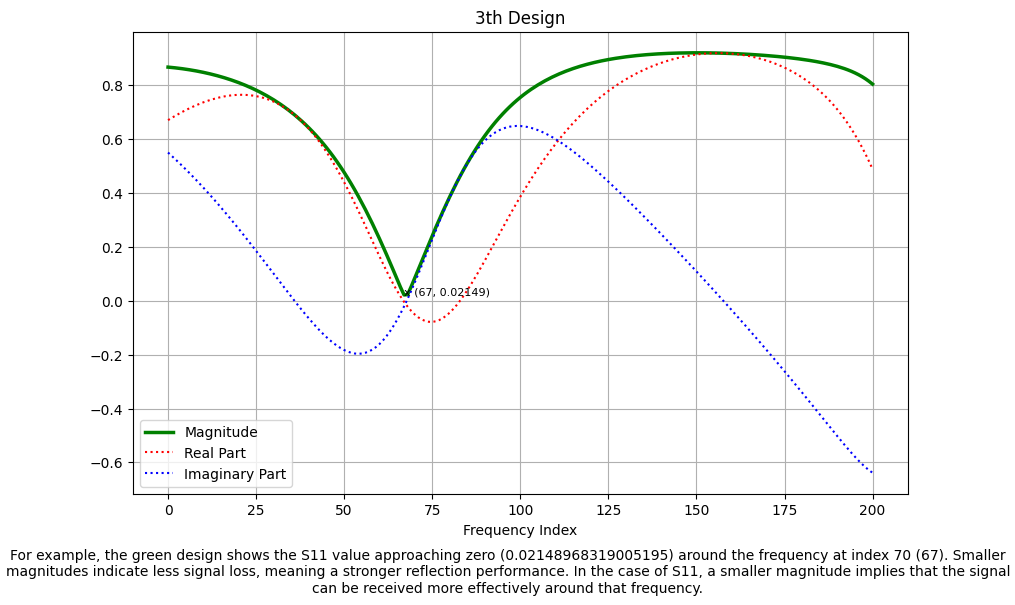

## Regression

In [296]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score

####  1. Multitarget Regression

* S11 values are evaluated at 201 frequency points.

In [578]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=101)))])
# Split the data and S11_target into training and testing data
X_train, X_test, y_train_201, y_test_201 = train_test_split(data, S11_target, test_size=0.3, random_state=101)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train_201)
# Make predictions on the test set
y_pred_201 = pipe.predict(X_test)
# Calculate the mean squared error
MSE_1 = mean_squared_error(y_test_201, y_pred_201, multioutput='uniform_average')
# Prints the accuracy score
print(pipe.score(X_test, y_test_201))
print(MSE_1)

0.5594020626180238
0.019159774874724738


* S11 parameters, real and imaginary parts are evaluated separately at 201 frequency points.

In [583]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=101)))])
# Split the data and S11 parameters into training and testing data, use the same model using two different target sets.
X_train, X_test, y_train_201_real, y_test_201_real = train_test_split(data, real_S11[1::].reset_index(drop=True), test_size=0.3, random_state=101)
X_train, X_test, y_train_201_imag, y_test_201_imag = train_test_split(data, imag_S11[1::].reset_index(drop=True), test_size=0.3, random_state=101)
# Fit the pipeline to the training data and get predictions for both real and imaginary parameters.
pipe.fit(X_train, y_train_201_real)
real_201_predict= pipe.predict(X_test)
pipe.fit(X_train, y_train_201_imag)
imag_201_predict= pipe.predict(X_test)
# Calculate the S11 values
S11_magnitude_predict = np.sqrt(real_201_predict**2 + imag_201_predict**2)
S11_magnitude_test = np.sqrt(y_test_201_real**2 + y_test_201_imag**2)
# Score the mse on the test set
MSE_2 = mean_squared_error(S11_magnitude_test, S11_magnitude_predict)
# Prints the mse
print(MSE_2)

0.04225208448301995


0.0422520844830199

#### 2. Multitarget (At Resonance Frequencies) Regression

* S11 values are evaluated at 3 key frequency points (0,100,200).

In [560]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=101)))])
# Split the data and S11_target into training and testing data
X_train, X_test, y_train, y_test = train_test_split(data, S11_target.iloc[:, key_frequencies], test_size=0.3, random_state=101)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)
# Make predictions on the test set
y_pred = pipe.predict(X_test)
# Calculate the mean squared error
MSE_3 = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
# Prints the accuracy score
print(MSE_3)

0.018801862109574585


* S11 parameters, real and imaginary parts are evaluated separately at 3 key frequency points.

In [561]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=101)))])
# Split the data and S11 parameters into training and testing data, use the same model using two different target sets.
X_train, X_test, y_train1, y_test1 = train_test_split(data, real_S11[1::].reset_index(drop=True).iloc[:, key_frequencies], test_size=0.3, random_state=101)
X_train, X_test, y_train2, y_test2 = train_test_split(data, imag_S11[1::].reset_index(drop=True).iloc[:, key_frequencies], test_size=0.3, random_state=101)
# Fit the pipeline to the training data and get predictions for both real and imaginary parameters.
pipe.fit(X_train, y_train1)
real_S11_predict= pipe.predict(X_test)
pipe.fit(X_train, y_train2)
imag_S11_predict= pipe.predict(X_test)
# Calculate the S11 values
S11_magnitude_predict = np.sqrt(real_S11_predict**2 + imag_S11_predict**2)
S11_magnitude_test = np.sqrt(y_test1**2 + y_test2**2)
# Score the mse on the test set
MSE_4 = mean_squared_error(S11_magnitude_test, S11_magnitude_predict)
# Prints the mse
print(MSE_4)

0.04507268081460516


#### 3. Multi Target Regression (PCA Applied)

* S11 values are evaluated by 4 principle components.

In [641]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', RandomForestRegressor(random_state=101))])
# Split the data and S11_target into training and testing data
X_train, X_test, y_train_pca, y_test_pca = train_test_split(data, S11_target_pca, test_size=0.3, random_state=101)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train_pca)
# Make predictions on the test set
y_pred_pca = pipe.predict(X_test)
# Calculate the mean squared error
MSE_5 = mean_squared_error(y_test_pca, y_pred_pca)
# Prints the accuracy score
print(MSE_5)

15.214632867210318


In [642]:
# Reconstruct the original data from the principle components
S11_pred_reconstructed = scaler1.inverse_transform(pca1.inverse_transform(y_pred_pca))
S11_test_reconstructed = scaler1.inverse_transform(pca1.inverse_transform(y_test_pca))

In [677]:
# Calculate the mean squared error of prediction and the test magnitude (reconstructed from 4 principle components)
MSE_5_1 = mean_squared_error(S11_pred_reconstructed, S11_test_reconstructed)
# Prints the mse
print(MSE_5_1)

0.013517684318910475


In [678]:
# Calculate the mean squared error of prediction and the real magnitude
MSE_5_2 = mean_squared_error(S11_pred_reconstructed, y_test_201) 
# Prints the mse
print(MSE_5_2)

0.017027761884641314


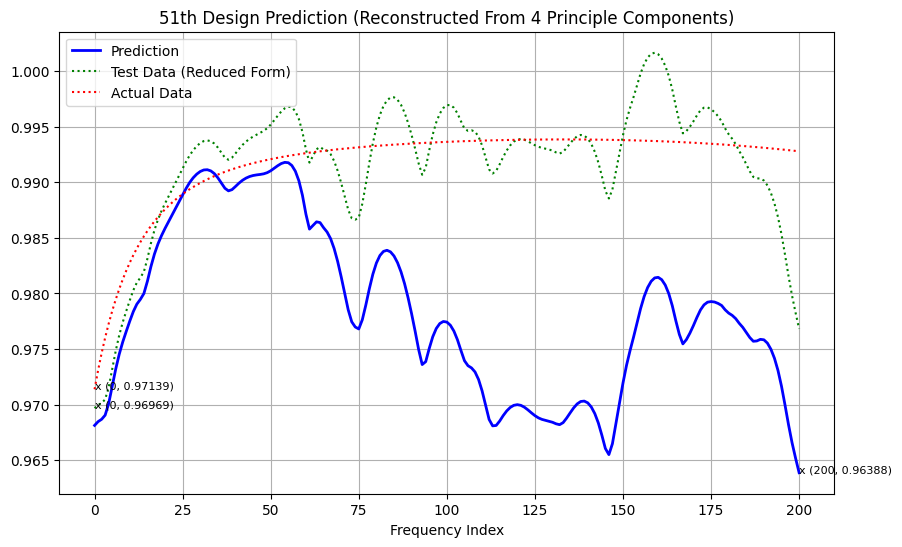

In [650]:
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('51th Design Prediction (Reconstructed From 4 Principle Components)')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "", 
            ha="center", fontsize=10, wrap=True)
min_value = np.min(S11_pred_reconstructed[4, :])
min_index = np.argmin(S11_pred_reconstructed[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_pred_reconstructed[4, :], label="Prediction", c='b', lw=2)

min_value = np.min(S11_test_reconstructed[4, :])
min_index = np.argmin(S11_test_reconstructed[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_test_reconstructed[4, :], label="Test Data (Reduced Form)",c='g',  ls=':', lw=1.5)

min_value = np.min(y_test_201.iloc[4, :])
min_index = np.argmin(y_test_201.iloc[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(y_test_201.iloc[4, :], label="Actual Data", c='r', ls=':', lw=1.5)

ax.legend(loc="best", fontsize=10)

* S11 parameters, real and imaginary parts are evaluated by 4 principle components.

In [652]:

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=8)),
        ('regressor', RandomForestRegressor(random_state=101))])
# Split the data and S11_target into training and testing data
X_train, X_test, y_train_pca_real, y_test_pca_real = train_test_split(data, Real_pca, test_size=0.3, random_state=101)
X_train, X_test, y_train_pca_imag, y_test_pca_imag = train_test_split(data, Imag_pca, test_size=0.3, random_state=101)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train_pca_real)
# Make predictions on the test set
y_pred_pca_real = pipe.predict(X_test)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train_pca_imag)
# Make predictions on the test set
y_pred_pca_imag = pipe.predict(X_test)

# Calculate the mean squared error
MSE_6 = mean_squared_error(y_test_pca_real, y_pred_pca_real, multioutput='uniform_average')
# Prints the accuracy score
print(MSE_6)

# Calculate the mean squared error
MSE_7 = mean_squared_error(y_test_pca_imag, y_pred_pca_imag, multioutput='uniform_average')
# Prints the accuracy score
print(MSE_7)


8.7410756222609
36.02693734160932


In [653]:
# Reconstruct the original data from the principle components
real_pred_reconstructed = scaler2.inverse_transform(pca2.inverse_transform(y_pred_pca_real))
real_test_reconstructed = scaler2.inverse_transform(pca2.inverse_transform(y_test_pca_real))
imag_pred_reconstructed = scaler3.inverse_transform(pca3.inverse_transform(y_pred_pca_imag))
imag_test_reconstructed = scaler3.inverse_transform(pca3.inverse_transform(y_test_pca_imag))

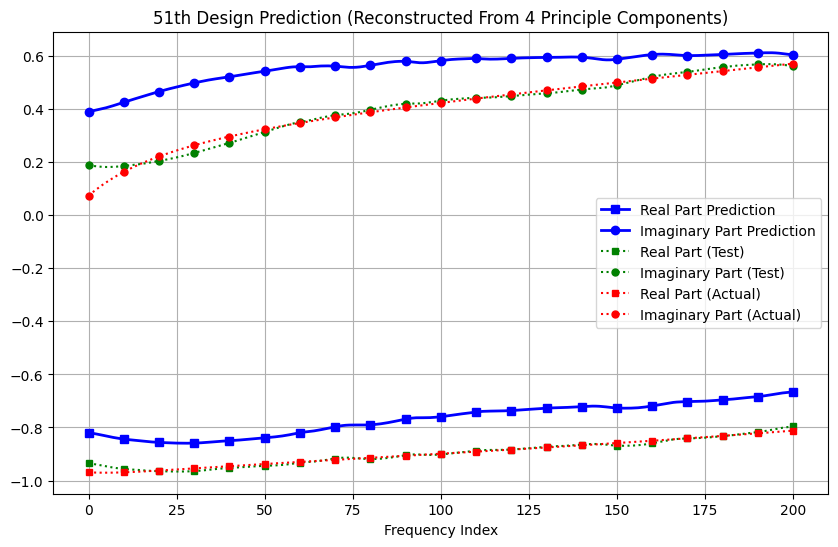

In [669]:
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('51th Design Prediction (Reconstructed From 4 Principle Components)')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "", 
            ha="center", fontsize=10, wrap=True)

plt.plot(real_pred_reconstructed[4, :], label="Real Part Prediction",marker='s',markevery=10, c='b', lw=2)
plt.plot(imag_pred_reconstructed[4, :], label="Imaginary Part Prediction",marker='o',markevery=10, c='b',lw=2)

plt.plot(real_test_reconstructed[4, :], label="Real Part (Test)",marker='s',markevery=10,markersize=5, c='g',ls=':', lw=1.5)
plt.plot(imag_test_reconstructed[4, :], label="Imaginary Part (Test)",marker='o',markevery=10,markersize=5, c='g',ls=':',lw=1.5)

plt.plot(y_test_201_real.iloc[4, :], label="Real Part (Actual)",marker='s',markevery=10,markersize=5, c='r',ls=':', lw=1.5)
plt.plot(y_test_201_imag.iloc[4, :], label="Imaginary Part (Actual)",marker='o',markevery=10,markersize=5, c='r',ls=':',lw=1.5)

ax.legend(loc="best", fontsize=10)


In [687]:
# Calculate the S11 values
S11_magnitude_predict = np.sqrt(real_pred_reconstructed**2 + imag_pred_reconstructed**2)
S11_magnitude_test = np.sqrt(real_test_reconstructed**2 + imag_test_reconstructed**2)
S11_magnitude = np.sqrt(y_test_201_real**2 + y_test_201_imag**2)


In [688]:
# Score the mse on the test set
MSE_7_1 = mean_squared_error(S11_magnitude_test, S11_magnitude_predict)
# Prints the mse
print(MSE_7_1)

0.044323588402768226


In [689]:
# Score the mse on the actual set
MSE_7_2 = mean_squared_error(S11_magnitude, S11_magnitude_predict)
# Prints the mse
print(MSE_7_2)

0.035406445184256806


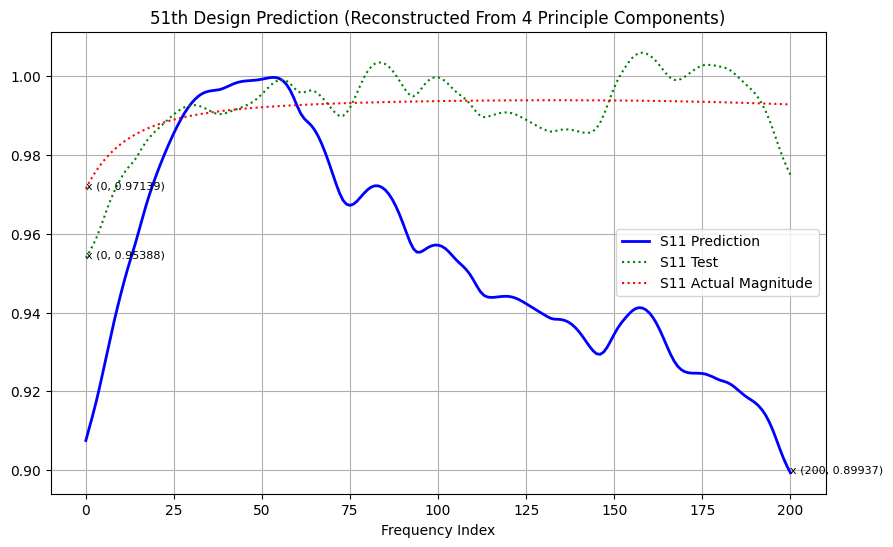

In [692]:
fig, ax = plt.subplots(figsize=(10, 6))
# Customize the plot
ax.set_title('51th Design Prediction (Reconstructed From 4 Principle Components)')
ax.set_xlabel('Frequency Index')
ax.grid(True)
# Add a caption below the plot
plt.figtext(0.5, -0.05, "", 
            ha="center", fontsize=10, wrap=True)
min_value = np.min(S11_magnitude_predict[4, :])
min_index = np.argmin(S11_magnitude_predict[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_magnitude_predict[4, :], label="S11 Prediction", c='b', lw=2)

min_value = np.min(S11_magnitude_test[4, :])
min_index = np.argmin(S11_magnitude_test[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_magnitude_test[4, :], label="S11 Test", c='g', ls=':', lw=1.5)

min_value = np.min(S11_magnitude.iloc[4, :])
min_index = np.argmin(S11_magnitude.iloc[4, :])
plt.text(min_index, min_value, f'x ({min_index}, {min_value:.5f})', fontsize=8, ha='left')
plt.plot(S11_magnitude.iloc[4, :], label="S11 Actual Magnitude", c='r', ls=':', lw=1.5)

ax.legend(loc="best", fontsize=10)